In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans 
%matplotlib inline

In [98]:
df = pd.read_excel("D:\DATA SCIENCE {G L}\Data mining project\Clustering Clean Ads_Data-1.xlsx")

In [99]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.0041,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN


In [100]:
df.head().T

,0,1,2,3,4
Timestamp,2020-9-2-17,2020-9-2-10,2020-9-1-22,2020-9-3-20,2020-9-4-15
InventoryType,Format1,Format1,Format1,Format1,Format1
Ad - Length,300,300,300,300,300
Ad- Width,250,250,250,250,250
Ad Size,75000,75000,75000,75000,75000
Ad Type,Inter222,Inter227,Inter222,Inter228,Inter217
Platform,Video,App,Video,Video,Web
Device Type,Desktop,Mobile,Desktop,Mobile,Desktop
Format,Display,Video,Display,Video,Video
Available_Impressions,1806,1780,2727,2430,1218


In [101]:
df.tail().T

,23061,23062,23063,23064,23065
Timestamp,2020-9-13-7,2020-11-2-7,2020-9-14-22,2020-11-18-2,2020-9-14-0
InventoryType,Format5,Format5,Format5,Format4,Format5
Ad - Length,720,720,720,120,720
Ad- Width,300,300,300,600,300
Ad Size,216000,216000,216000,72000,216000
Ad Type,Inter220,Inter224,Inter218,inter230,Inter221
Platform,Web,Web,App,Video,App
Device Type,Mobile,Desktop,Mobile,Mobile,Mobile
Format,Video,Video,Video,Video,Video
Available_Impressions,1,3,2,7,2


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [103]:
df.duplicated().sum()

0

In [104]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [105]:
df.shape

(23066, 19)

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [107]:
def calculate_cTR(x):
    Clicks=df.Clicks
    Impressions=df.Impressions
    cTR = (Clicks/Impressions)
    return cTR

def calculate_cPC(x):
    Spend=df.Spend
    Clicks=df.Clicks
    cPC = (Spend/Clicks)
    return cPC

def calculate_cPM(x):
    Spend=df.Spend
    Impressions=df.Impressions
    cPM = (Spend/Impressions)*1000
    return cPM


In [108]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_cTR(x))
df['CPC']= df[['CPC']].apply(lambda x: calculate_cPC(x))
df['CPM']= df[['CPM']].apply(lambda x: calculate_cPM(x))

In [109]:
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0000,0.003096,0.0,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0000,0.003509,0.0,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0000,0.002817,0.0,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0000,0.002020,0.0,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0000,0.004132,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,1.000000,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,0.500000,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,1.000000,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,1.000000,70.0,0.07


In [110]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.000000,33672.250000,483771.000000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.000000,18282.500000,258087.500000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.000000,7990.500000,225290.000000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.000000,710.000000,4425.000000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.000000,85.180000,1425.125000,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.000000,55.365375,926.335000,2.091338e+03,2.127618e+04


In [112]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

In [113]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      23066 non-null  object
 1   InventoryType  23066 non-null  object
 2   Ad Type        23066 non-null  object
 3   Platform       23066 non-null  object
 4   Device Type    23066 non-null  object
 5   Format         23066 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [114]:
df_data = df.drop(['Timestamp', 'InventoryType', 'Ad Type', 'Platform',"Device Type","Format"], axis = 1)

In [115]:
len(df_data.columns)

13

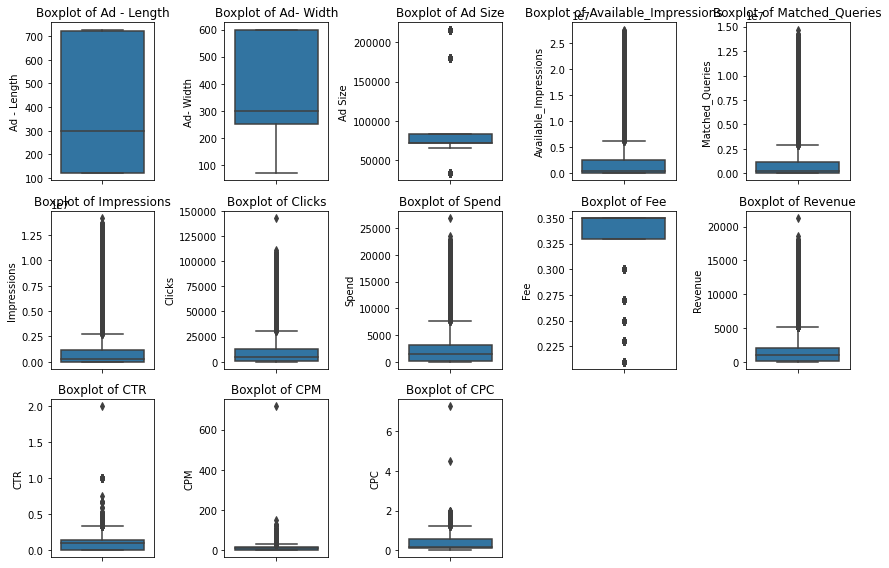

In [116]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_data.columns
for i in range(len(feature_list)):
    plt.subplot(3,5,i+1)
    sns.boxplot(y = df_data[feature_list[i]], data = df_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [117]:
df_data_scaled.head().T

,0,1,2,3,4
Ad - Length,-0.364496,-0.364496,-0.364496,-0.364496,-0.364496
Ad- Width,-0.432797,-0.432797,-0.432797,-0.432797,-0.432797
Ad Size,-0.102518,-0.102518,-0.102518,-0.102518,-0.102518
Available_Impressions,-0.755333,-0.755345,-0.754900,-0.755040,-0.755610
Matched_Queries,-0.778949,-0.778988,-0.778919,-0.778781,-0.779030
Impressions,-0.768478,-0.768516,-0.768445,-0.768302,-0.768560
Clicks,-0.867488,-0.867488,-0.867488,-0.867488,-0.867488
Spend,-0.893170,-0.893170,-0.893170,-0.893170,-0.893170
Fee,0.535724,0.535724,0.535724,0.535724,0.535724
Revenue,-0.880093,-0.880093,-0.880093,-0.880093,-0.880093


In [118]:
from scipy.stats import zscore
df_data_scaled = df_data.apply(zscore)

In [119]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [120]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier( df_data[i])
    df_data[i] = np.where(df_data[i] > UL, UL, df_data[i])
    df_data[i] = np.where(df_data[i] < LL, LL, df_data[i])

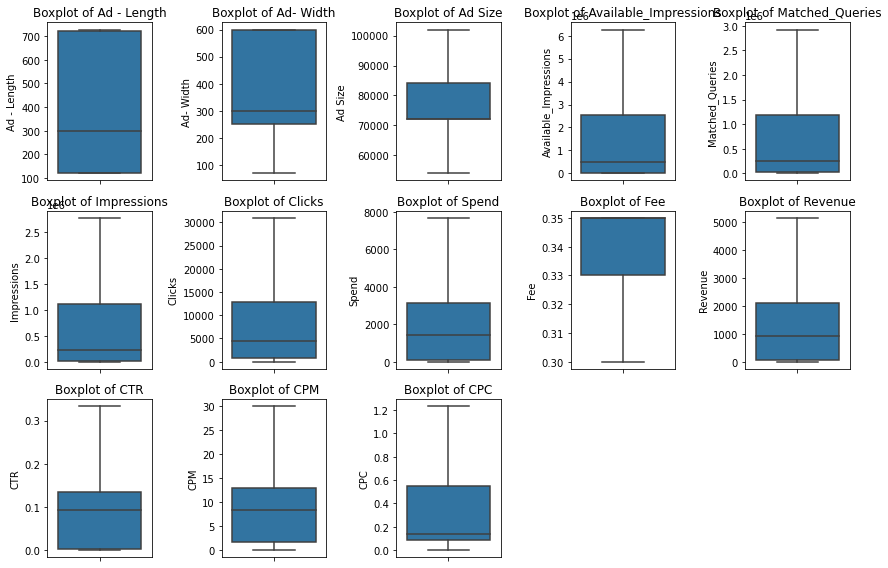

In [121]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_data.columns
for i in range(len(feature_list)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y = df_data[feature_list[i]], data = df_data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [122]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,7.657684e+04,1.538132e+04,54000.000000,72000.000000,72000.000000,8.400000e+04,1.020000e+05
Available_Impressions,23066.0,1.607253e+06,2.125528e+06,1.000000,33672.250000,483771.000000,2.527712e+06,6.268771e+06
Matched_Queries,23066.0,7.995380e+05,1.026037e+06,1.000000,18282.500000,258087.500000,1.180700e+06,2.924326e+06
Impressions,23066.0,7.536120e+05,9.802568e+05,1.000000,7990.500000,225290.000000,1.112428e+06,2.769086e+06
Clicks,23066.0,8.306828e+03,9.574779e+03,1.000000,710.000000,4425.000000,1.279375e+04,3.091938e+04
Spend,23066.0,2.166060e+03,2.425190e+03,0.000000,85.180000,1425.125000,3.121400e+03,7.675730e+03
Fee,23066.0,3.402883e-01,1.812855e-02,0.300000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.449389e+03,1.646894e+03,0.000000,55.365375,926.335000,2.091338e+03,5.145297e+03


In [123]:

df_data_scaled = df_data.apply(zscore)

In [124]:
#z score scaling
df_data_scaled.head().T

,0,1,2,3,4
Ad - Length,-0.364496,-0.364496,-0.364496,-0.364496,-0.364496
Ad- Width,-0.432797,-0.432797,-0.432797,-0.432797,-0.432797
Ad Size,-0.102518,-0.102518,-0.102518,-0.102518,-0.102518
Available_Impressions,-0.755333,-0.755345,-0.754900,-0.755040,-0.755610
Matched_Queries,-0.778949,-0.778988,-0.778919,-0.778781,-0.779030
Impressions,-0.768478,-0.768516,-0.768445,-0.768302,-0.768560
Clicks,-0.867488,-0.867488,-0.867488,-0.867488,-0.867488
Spend,-0.893170,-0.893170,-0.893170,-0.893170,-0.893170
Fee,0.535724,0.535724,0.535724,0.535724,0.535724
Revenue,-0.880093,-0.880093,-0.880093,-0.880093,-0.880093


In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [126]:
df_data.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.003096,0.0,0.0
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.003509,0.0,0.0
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.002817,0.0,0.0
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.002020,0.0,0.0
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.004132,0.0,0.0


In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
wardlink = linkage(df_data, method = 'ward')

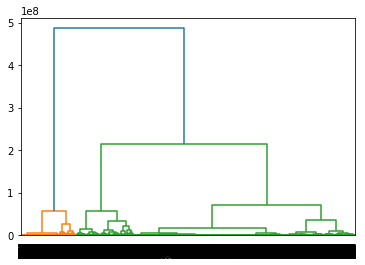

In [129]:
dend = dendrogram(wardlink)

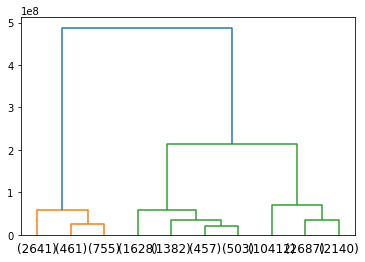

In [130]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [131]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [139]:

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df_data.iloc[:,1:6])
print(Cluster_agglo)

[3 3 3 ... 3 3 3]


In [142]:
# Set n_clusters=4,affinity='euclidean', linkage='average' and store the result in another object 'Cluster_agglo'

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df_data.iloc[:,1:6])
print(Cluster_agglo)

[0 0 0 ... 0 0 0]


In [143]:
df_data["Agglo_CLusters"]=Cluster_agglo

In [144]:
df_data.Agglo_CLusters.value_counts().sort_index()

0    15207
1     3840
2     4019
Name: Agglo_CLusters, dtype: int64

In [145]:
agglo_data=df_data.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df_data.Agglo_CLusters.value_counts().sort_index()
agglo_data.T

Agglo_CLusters,0,1,2
Ad - Length,352.608404,4.692792e+02,4.279731e+02
Ad- Width,421.438811,1.978958e+02,1.555536e+02
Ad Size,80590.649043,7.287938e+04,6.492224e+04
Available_Impressions,290384.487341,5.820763e+06,2.564142e+06
Matched_Queries,170729.224699,2.848486e+06,1.221119e+06
Impressions,150225.910831,2.709342e+06,1.168066e+06
Clicks,8461.494394,1.162750e+04,4.548835e+03
Spend,1252.824864,5.841105e+03,2.110175e+03
Fee,0.345405,3.126120e-01,3.473725e-01
Revenue,836.559340,3.948062e+03,1.380812e+03


In [40]:
X = StandardScaler()

In [41]:
scaled_df = X.fit_transform(df_data)

In [190]:
scaled_df

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -1.04256138,
         0.68428817,  0.        ],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -1.04256138,
         0.68428817,  0.        ],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -1.04256138,
         0.68428817,  0.        ],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ..., -0.88461411,
         0.68428817,  0.        ],
       [-1.13489073,  1.29058999, -0.29756446, ..., -0.82143521,
         0.68428817,  0.        ],
       [ 1.43309269, -0.18659865,  1.65289551, ..., -0.7582563 ,
         0.68428817,  0.        ]])

In [191]:
k_means = KMeans(n_clusters = 2)

In [192]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [193]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [194]:
k_means.inertia_

193745.3203376045

In [195]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

322924.00000000006

In [196]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

193745.19479809597

In [197]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

138464.3590097109

In [198]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

102147.52082725984

In [199]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

68425.12208195758

In [46]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

51676.89230709958

In [43]:
wss =[] 

In [44]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [45]:
wss

[299857.99999999994,
 183349.11022749555,
 130878.34520050167,
 95133.92434119369,
 61539.18919785384,
 51676.97929207229,
 44598.258497467934,
 39597.84594043491,
 36061.71412288905,
 32998.426997791605]

In [47]:
a=[1,2,3,4,5,6,7,8,9,10]

D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

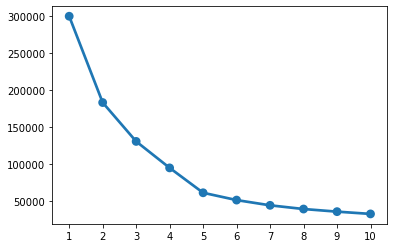

In [48]:
sns.pointplot(a, wss)

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_

In [87]:
df_data["Clus_kmeans"] = labels
df_data.head(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.003096,0.0,0.0,1
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.003509,0.0,0.0,1
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.002817,0.0,0.0,1
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.002020,0.0,0.0,1
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.004132,0.0,0.0,1


In [88]:
silhouette_score(scaled_df,labels)

0.5240956940501856

In [96]:
df_data.sort_values(by='Clus_kmeans',ascending=True).tail()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,Agglo_CLusters
9888,720.0,300.0,102000.0,421455.0,204297.0,163232.0,19982.0,1647.03,0.35,1070.5700,0.122415,10.090117,0.082426,4,3
9890,720.0,300.0,102000.0,485032.0,225788.0,183510.0,21896.0,1647.59,0.35,1070.9300,0.119318,8.978203,0.075246,4,2
4829,720.0,300.0,102000.0,38667.0,23290.0,19056.0,2639.0,247.32,0.35,160.7600,0.138487,12.978589,0.093717,4,3
4840,720.0,300.0,102000.0,29224.0,20414.0,18136.0,2592.0,252.11,0.35,163.8700,0.142920,13.901081,0.097265,4,3
23065,720.0,300.0,102000.0,2.0,2.0,2.0,1.0,0.09,0.35,0.0585,0.332788,29.981418,0.090000,4,3


In [248]:
df_data["sil_width"] = sil_width
df_data.head(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.003096,0.0,0.0,0,0.142638
1,300.0,250.0,75000.0,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.003509,0.0,0.0,0,0.142007
2,300.0,250.0,75000.0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.002817,0.0,0.0,0,0.143092
3,300.0,250.0,75000.0,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.002020,0.0,0.0,0,0.144273
4,300.0,250.0,75000.0,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.004132,0.0,0.0,0,0.141021


In [249]:
silhouette_score(scaled_df,labels,random_state=1)

0.5240956940501857

In [99]:
df_data.Clus_kmeans.value_counts().sort_index()

0    1537
1    6275
2    4054
3    6524
4    4676
Name: Clus_kmeans, dtype: int64

In [98]:
clust_profile=df_data.drop([],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_data.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1,2,3,4
Ad - Length,141.454782,4.216963e+02,4.657819e+02,143.280809,683.825492
Ad- Width,572.446324,1.520016e+02,1.991490e+02,572.103004,303.785287
Ad Size,73686.402082,6.430000e+04,7.296394e+04,73966.738197,100775.876818
Available_Impressions,806328.422902,1.810314e+06,5.695405e+06,32093.558860,251346.513687
Matched_Queries,566864.050748,8.642623e+05,2.806219e+06,19624.057633,137550.912104
Impressions,478148.522446,8.262209e+05,2.671268e+06,13492.040313,116771.362703
Clicks,30572.439330,3.263132e+03,1.124575e+04,1914.448804,14127.278203
Spend,6546.373195,1.500091e+03,5.739328e+03,209.162609,1252.285569
Fee,0.305569,3.492637e-01,3.132807e-01,0.349988,0.349538
Revenue,4471.776116,9.774242e+02,3.878748e+03,135.993379,815.541831


In [22]:
df.groupby('Device Type')['CTR'].sum().sort_values(ascending = False).reset_index()


,Device Type,CTR
0,Mobile,865.4891
1,Desktop,484.7086


In [23]:
df.groupby('Device Type')['Clicks'].sum().sort_values(ascending = False).reset_index()

,Device Type,Clicks
0,Mobile,157245043
1,Desktop,89065672


In [26]:
df.groupby('Device Type')['Spend'].sum().sort_values(ascending = False).reset_index()

,Device Type,Spend
0,Mobile,39982888.12
1,Desktop,22448140.02


In [29]:
df.groupby('Device Type')['Revenue'].sum().sort_values(ascending = False).reset_index()

,Device Type,Revenue
0,Mobile,2.842119e+07
1,Desktop,1.596361e+07


In [31]:
df.groupby('Device Type')['CPM'].sum().sort_values(ascending = False).reset_index()

,Device Type,CPM
0,Mobile,90310.12
1,Desktop,50318.47


In [33]:
df.groupby('Device Type')['CPC'].sum().sort_values(ascending = False).reset_index()

,Device Type,CPC
0,Mobile,4138.05
1,Desktop,2296.89


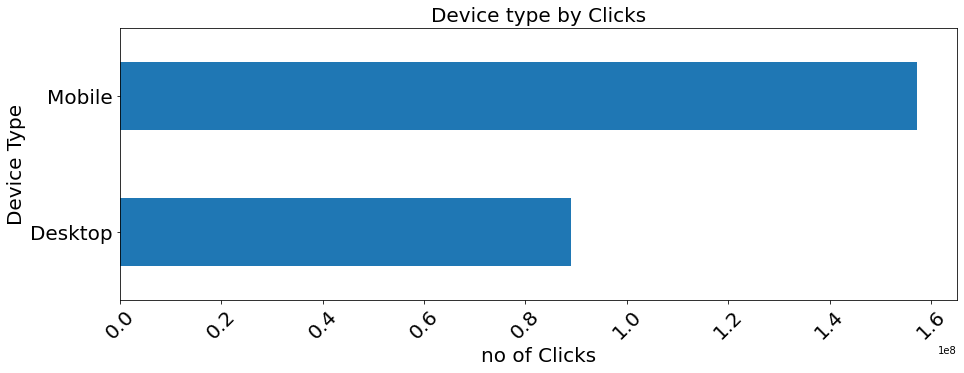

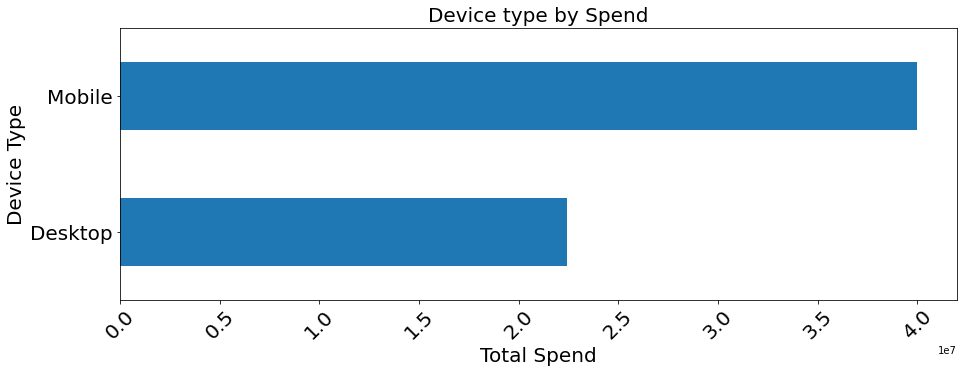

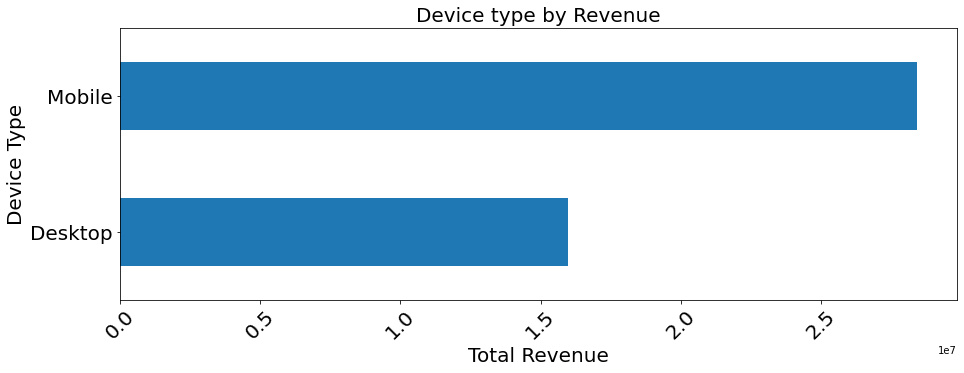

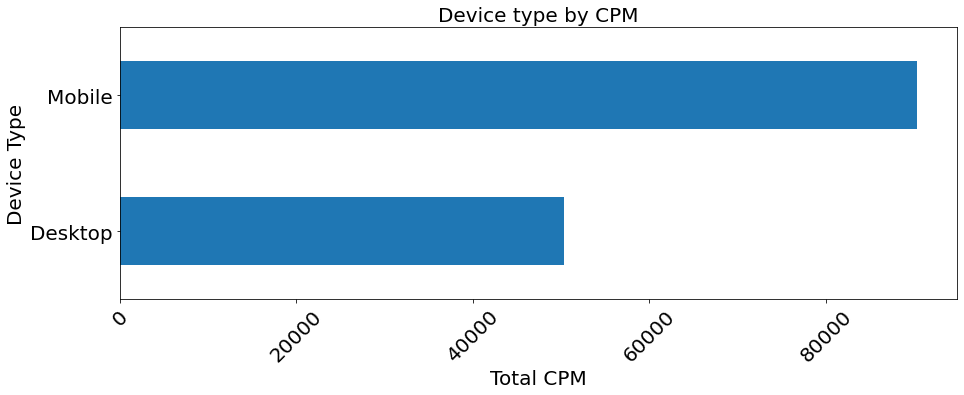

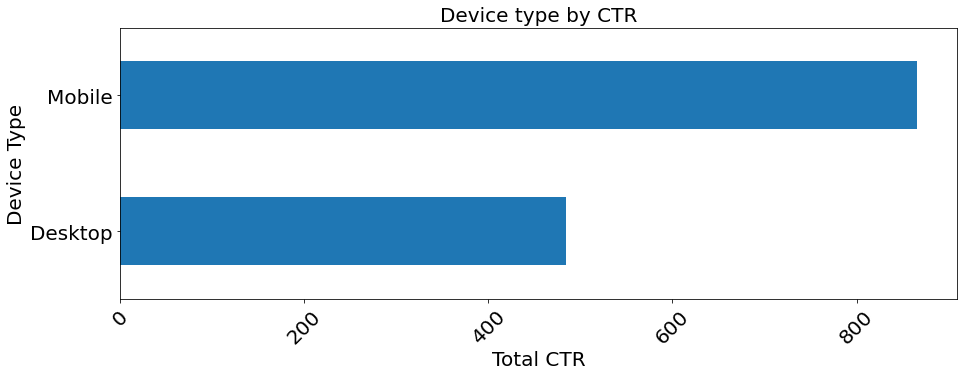

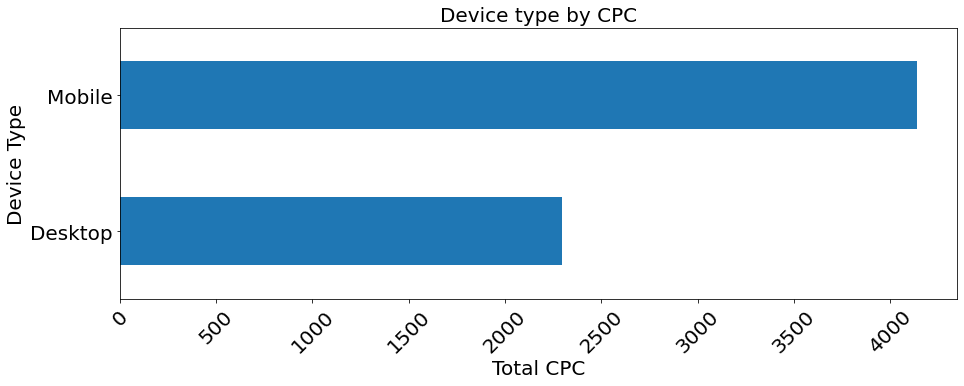

In [34]:

plt.figure(figsize=[15,5])
df.groupby('Device Type')['Clicks'].sum().sort_values().plot.barh();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type by Clicks",fontsize = 20)
plt.xlabel('no of Clicks',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)



plt.figure(figsize=[15,5])
df.groupby('Device Type')['Spend'].sum().sort_values().plot.barh();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type by Spend",fontsize = 20)
plt.xlabel('Total Spend',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.figure(figsize=[15,5])
df.groupby('Device Type')['Revenue'].sum().sort_values().plot.barh();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type by Revenue",fontsize = 20)
plt.xlabel('Total Revenue',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.figure(figsize=[15,5])
df.groupby('Device Type')['CPM'].sum().sort_values().plot.barh();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type by CPM",fontsize = 20)
plt.xlabel('Total CPM',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.figure(figsize=[15,5])
df.groupby('Device Type')['CTR'].sum().sort_values().plot.barh();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type by CTR",fontsize = 20)
plt.xlabel('Total CTR',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)


plt.figure(figsize=[15,5])
df.groupby('Device Type')['CPC'].sum().sort_values().plot.barh();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type by CPC",fontsize = 20)
plt.xlabel('Total CPC',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.show()

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08, 1.6e+08, 1.8e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

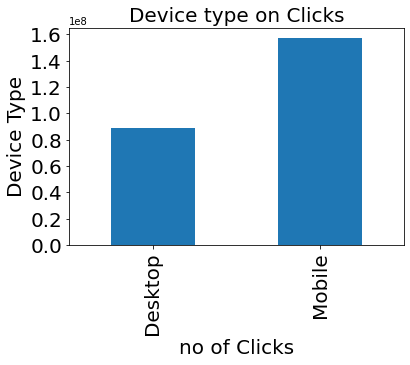

In [149]:
df.groupby('Device Type')['Clicks'].sum().sort_values().plot.bar();
plt.ylabel('Device Type',fontsize = 20)
plt.title("Device type on Clicks",fontsize = 20)
plt.xlabel('no of Clicks',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [229]:
clust_profile.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
count,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,420.796182,344.595916,100471.766856,4.670445e+06,2.509003e+06,2.399095e+06,22289.290670,5558.292088,0.311268,4111.732196,0.087823,0.008991,0.356335,4613.200000
std,276.986195,212.128223,64961.757207,8.145377e+06,4.312887e+06,4.164379e+06,27721.967463,6562.574619,0.050882,5073.576309,0.078038,0.006745,0.364614,3412.717348
min,142.244776,116.989721,60911.973034,7.758195e+04,4.366709e+04,3.489142e+04,3660.982546,408.476695,0.235316,267.823529,0.001904,0.001681,0.089518,1340.000000
25%,155.499654,175.305618,70106.255507,2.440876e+05,1.335158e+05,1.133053e+05,4532.854157,1214.064912,0.282164,790.687666,0.003527,0.001712,0.105515,1362.000000
50%,402.647640,300.000000,75868.656716,8.753492e+05,6.116135e+05,5.160796e+05,14034.688810,2500.659154,0.339901,1678.653514,0.137865,0.012117,0.108339,4245.000000
75%,683.588840,558.893199,79471.949023,3.071497e+06,1.613056e+06,1.562668e+06,18654.668135,7432.128246,0.349414,5362.596805,0.139346,0.014504,0.592394,7219.000000
max,720.000000,571.791045,216000.000000,1.908371e+07,1.014316e+07,9.768530e+06,70563.259701,16236.131432,0.349543,12458.899469,0.156475,0.014942,0.885907,8900.000000


Problem 2

In [4]:
df1 = pd.read_excel("D:\DATA SCIENCE {G L}\Data mining project\PCA India Data_Census.xlsx")

In [5]:
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [6]:
df1.shape

(640, 61)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [6]:
df1.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [9]:
df1.duplicated().sum()

0

In [7]:

df2=df1.drop(['State Code','Dist.Code'], axis = 1)
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0
F_ST,640.0,10155.640625,15875.701488,0.0,429.50,3834.5,12480.25,130119.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0


In [11]:
df2.shape

(640, 59)

In [12]:
df1.shape

(640, 61)

In [30]:
data

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,gender_ratio
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,749,180,237,680,252,32,46,258,214,0.784938
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,715,123,229,186,148,76,178,140,160,0.847762
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,188,44,89,3,34,0,4,67,61,0.597045
3,1,4,1320,2784,4206,563,677,0,0,2666,...,247,61,128,13,50,4,10,116,59,0.661912
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,1928,465,1043,205,302,24,105,180,478,0.686802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,47,0,0,0,0,0,0,32,47,0.692131
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,337,3,14,38,130,4,23,110,170,0.569176
637,35,638,1275,1549,2630,227,225,0,0,1012,...,134,9,4,2,6,17,47,76,77,0.588973
638,35,639,3762,5200,8012,723,664,0,0,28,...,172,24,44,11,21,1,4,100,103,0.649026


In [8]:
df1_cat = df1.select_dtypes(include = ['object'])
lstcatcolumns = list(df1_cat.columns.values)
lstcatcolumns

['State', 'Area Name']

In [9]:
def calculate_genrat(x):
    TOT_M=df1.TOT_M
    TOT_F=df1.TOT_F
    genrat= (TOT_M/TOT_F)
    return genrat


In [10]:
calculate_genrat=(df1.TOT_M/df1.TOT_F)

In [11]:
df1['gender_ratio']=calculate_genrat

In [12]:
df1

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,gender_ratio
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,749,180,237,680,252,32,46,258,214,0.784938
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,715,123,229,186,148,76,178,140,160,0.847762
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,188,44,89,3,34,0,4,67,61,0.597045
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,247,61,128,13,50,4,10,116,59,0.661912
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,1928,465,1043,205,302,24,105,180,478,0.686802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,47,0,0,0,0,0,0,32,47,0.692131
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,337,3,14,38,130,4,23,110,170,0.569176
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,134,9,4,2,6,17,47,76,77,0.588973
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,172,24,44,11,21,1,4,100,103,0.649026


D:\softwares\jupyter\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


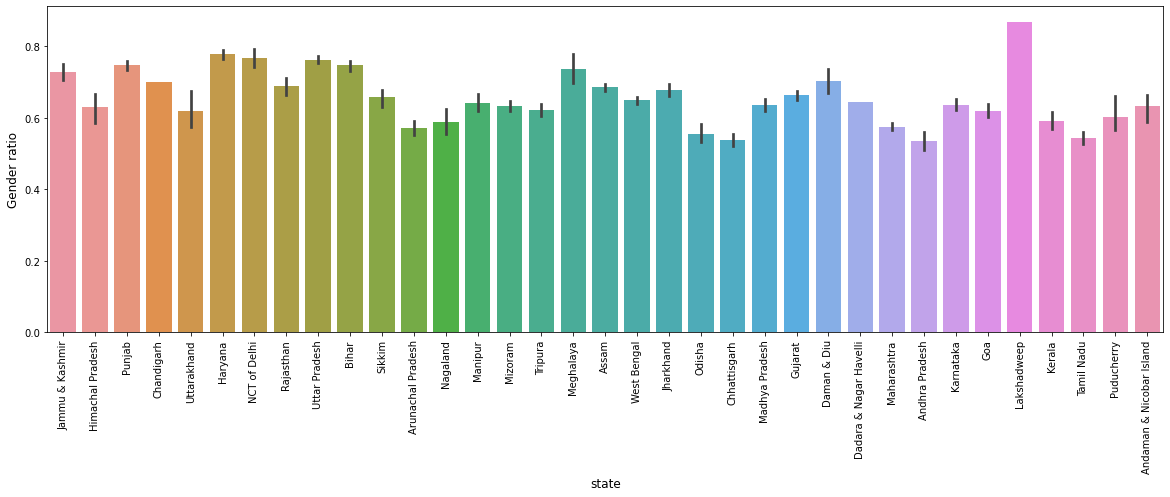

In [13]:
plt.figure(figsize = (20,6))
sns.barplot(df1["State"],df1['gender_ratio']);  
plt.ylabel("Gender ratio",fontsize = 12)
plt.xlabel("state",fontsize = 12)
plt.xticks(rotation = 90)# This code display the country names on x-axis verticaly
plt.show()

<Figure size 1584x1152 with 0 Axes>

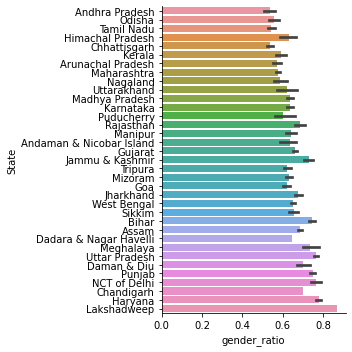

In [14]:
plt.figure(figsize = (22,16))
sns.catplot(x="gender_ratio", y="State", kind="bar", data=df1.sort_values(by='gender_ratio',ascending=True),height=5)
plt.show()

In [21]:
df1[df1['State'] == "Lakshadweep"].head(1).T

,586
State Code,31
Dist.Code,587
State,Lakshadweep
Area Name,Lakshadweep
No_HH,4445
...,...
MARG_OT_0_3_M,13
MARG_OT_0_3_F,7
NON_WORK_M,749
NON_WORK_F,352


In [22]:
df1[df1['State'] == "Tamil Nadu"].head(1).T

,601
State Code,33
Dist.Code,602
State,Tamil Nadu
Area Name,Thiruvallur
No_HH,124475
...,...
MARG_OT_0_3_M,110
MARG_OT_0_3_F,583
NON_WORK_M,1353
NON_WORK_F,2478


In [23]:
df1[df1['State'] == "Andhra Pradesh"].head(1).T

,531
State Code,28
Dist.Code,532
State,Andhra Pradesh
Area Name,Adilabad
No_HH,94688
...,...
MARG_OT_0_3_M,73
MARG_OT_0_3_F,292
NON_WORK_M,596
NON_WORK_F,1102


In [17]:
df1.groupby('State')['gender_ratio'].min().sort_values(ascending = False).reset_index()

,State,gender_ratio
0,Lakshadweep,0.868061
1,Haryana,0.710840
2,Chandigarh,0.700037
3,NCT of Delhi,0.697032
4,Punjab,0.677118
5,Daman & Diu,0.668574
6,Uttar Pradesh,0.666574
7,Meghalaya,0.665863
8,Dadara & Nagar Havelli,0.644631
9,Assam,0.630523


In [25]:
df1[df1.gender_ratio<0.5].sort_values(by='gender_ratio',ascending=False)['State'].tail(1)

546    Andhra Pradesh
Name: State, dtype: object

In [26]:
df1[df1.gender_ratio<0.5].sort_values(by='gender_ratio',ascending=False)['Area Name'].tail(1)

546    Krishna
Name: Area Name, dtype: object

In [27]:
df1[df1.gender_ratio>0.5].sort_values(by='gender_ratio',ascending=False)['State'].head(1)

586    Lakshadweep
Name: State, dtype: object

In [28]:
df1[df1.gender_ratio>0.5].sort_values(by='gender_ratio',ascending=False)['Area Name'].head(1)

586    Lakshadweep
Name: Area Name, dtype: object

In [25]:
data = df1.drop(['State','Area Name'], axis = 1)

In [26]:
df1.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [18]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

In [21]:
df_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

60

Description of State Code
----------------------------------------------------------------------------
count    640.000000
mean      17.114062
std        9.426486
min        1.000000
25%        9.000000
50%       18.000000
75%       24.000000
max       35.000000
Name: State Code, dtype: float64 Distribution of State Code
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


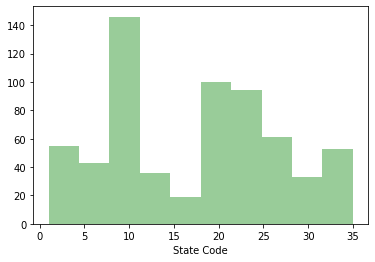

BoxPlot of State Code
----------------------------------------------------------------------------


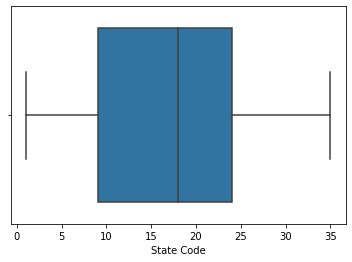

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of Dist.Code
----------------------------------------------------------------------------
count    640.000000
mean     320.500000
std      184.896367
min        1.000000
25%      160.750000
50%      320.500000
75%      480.250000
max      640.000000
Name: Dist.Code, dtype: float64 Distribution of Dist.Code
----------------------------------------------------------------------------


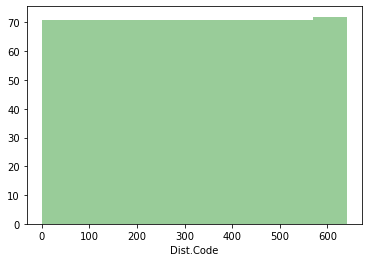

BoxPlot of Dist.Code
----------------------------------------------------------------------------


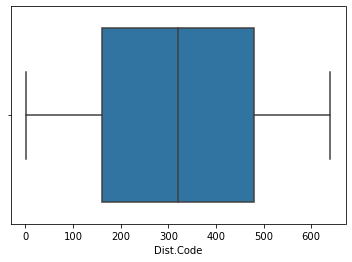

Description of No_HH
----------------------------------------------------------------------------
count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64 Distribution of No_HH
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


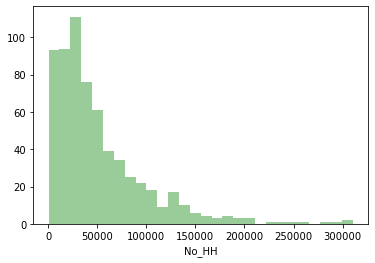

BoxPlot of No_HH
----------------------------------------------------------------------------


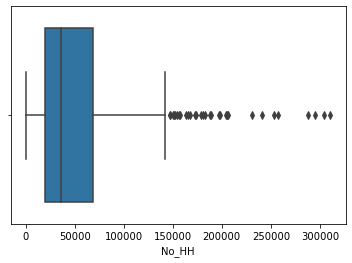

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of TOT_M
----------------------------------------------------------------------------
count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64 Distribution of TOT_M
----------------------------------------------------------------------------


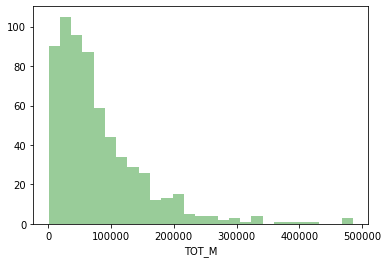

BoxPlot of TOT_M
----------------------------------------------------------------------------


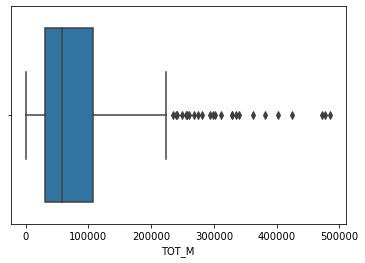

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of TOT_F
----------------------------------------------------------------------------
count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64 Distribution of TOT_F
----------------------------------------------------------------------------


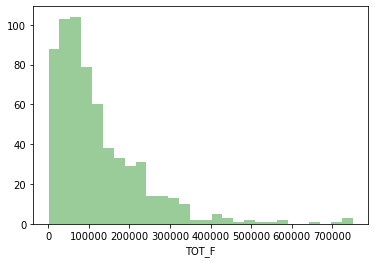

BoxPlot of TOT_F
----------------------------------------------------------------------------


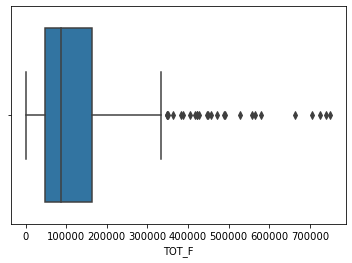

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of M_06
----------------------------------------------------------------------------
count      640.000000
mean     12309.098438
std      11500.906881
min         56.000000
25%       4733.750000
50%       9159.000000
75%      16520.250000
max      96223.000000
Name: M_06, dtype: float64 Distribution of M_06
----------------------------------------------------------------------------


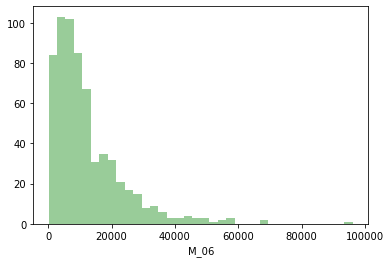

BoxPlot of M_06
----------------------------------------------------------------------------


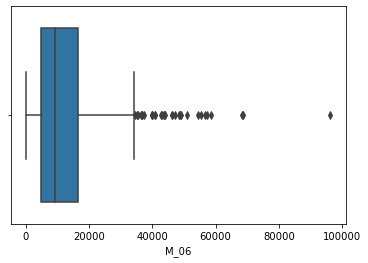

Description of F_06
----------------------------------------------------------------------------
count      640.000000
mean     11942.300000
std      11326.294567
min         56.000000
25%       4672.250000
50%       8663.000000
75%      15902.250000
max      95129.000000
Name: F_06, dtype: float64 Distribution of F_06
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


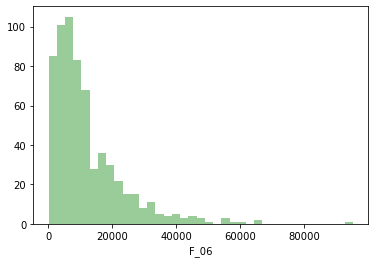

BoxPlot of F_06
----------------------------------------------------------------------------


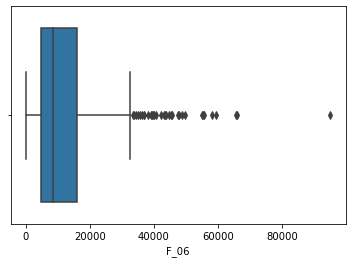

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of M_SC
----------------------------------------------------------------------------
count       640.000000
mean      13820.946875
std       14426.373130
min           0.000000
25%        3466.250000
50%        9591.500000
75%       19429.750000
max      103307.000000
Name: M_SC, dtype: float64 Distribution of M_SC
----------------------------------------------------------------------------


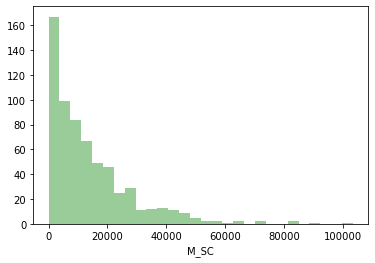

BoxPlot of M_SC
----------------------------------------------------------------------------


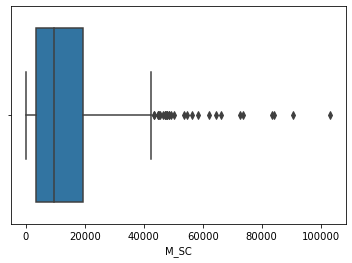

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of F_SC
----------------------------------------------------------------------------
count       640.000000
mean      20778.392188
std       21727.887713
min           0.000000
25%        5603.250000
50%       13709.000000
75%       29180.000000
max      156429.000000
Name: F_SC, dtype: float64 Distribution of F_SC
----------------------------------------------------------------------------


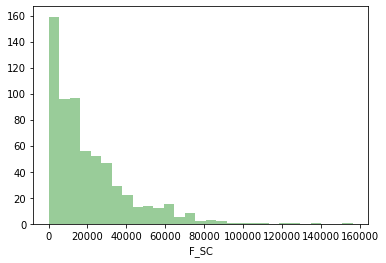

BoxPlot of F_SC
----------------------------------------------------------------------------


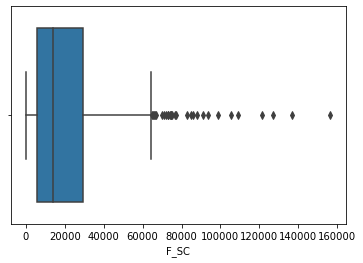

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of M_ST
----------------------------------------------------------------------------
count      640.000000
mean      6191.807813
std       9912.668948
min          0.000000
25%        293.750000
50%       2333.500000
75%       7658.000000
max      96785.000000
Name: M_ST, dtype: float64 Distribution of M_ST
----------------------------------------------------------------------------


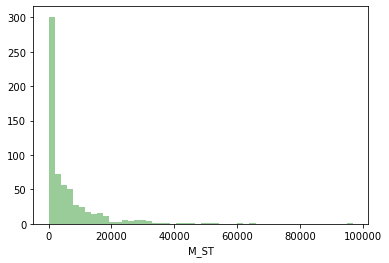

BoxPlot of M_ST
----------------------------------------------------------------------------


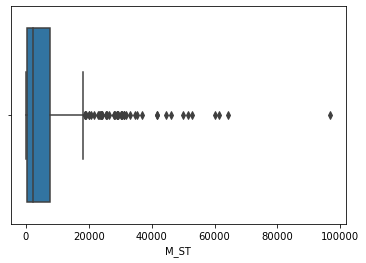

Description of F_ST
----------------------------------------------------------------------------
count       640.000000
mean      10155.640625
std       15875.701488
min           0.000000
25%         429.500000
50%        3834.500000
75%       12480.250000
max      130119.000000
Name: F_ST, dtype: float64 Distribution of F_ST
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


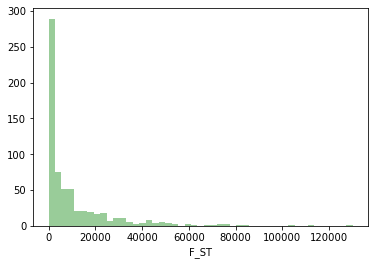

BoxPlot of F_ST
----------------------------------------------------------------------------


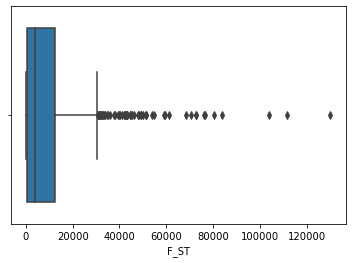

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


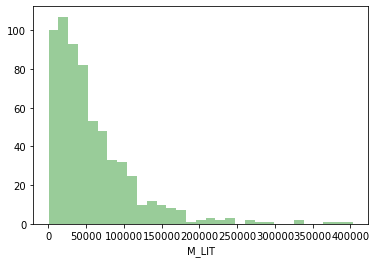

BoxPlot of M_LIT
----------------------------------------------------------------------------


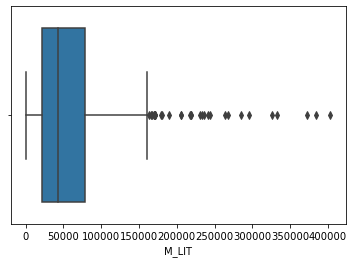

Description of F_LIT
----------------------------------------------------------------------------
count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64 Distribution of F_LIT
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


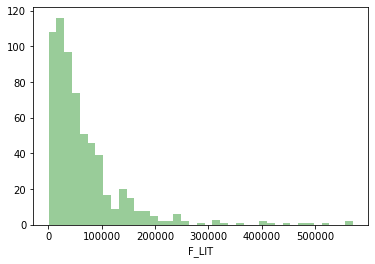

BoxPlot of F_LIT
----------------------------------------------------------------------------


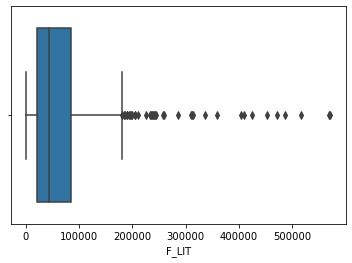

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL
----------------------------------------------------------------------------


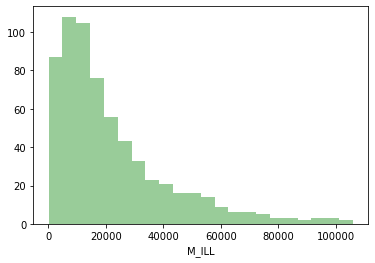

BoxPlot of M_ILL
----------------------------------------------------------------------------


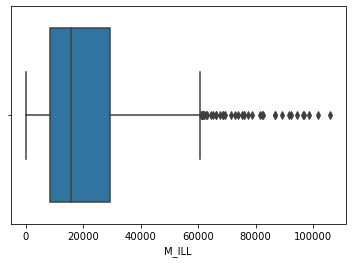

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL
----------------------------------------------------------------------------


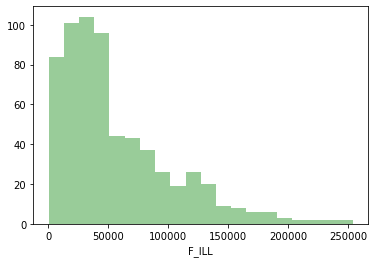

BoxPlot of F_ILL
----------------------------------------------------------------------------


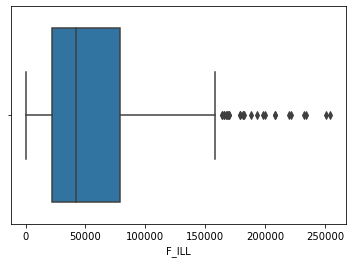

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of TOT_WORK_M
----------------------------------------------------------------------------
count       640.000000
mean      37992.407813
std       36419.537491
min         100.000000
25%       13753.500000
50%       27936.500000
75%       50226.750000
max      269422.000000
Name: TOT_WORK_M, dtype: float64 Distribution of TOT_WORK_M
----------------------------------------------------------------------------


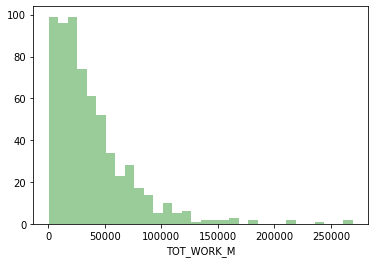

BoxPlot of TOT_WORK_M
----------------------------------------------------------------------------


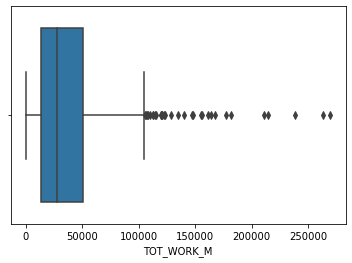

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------


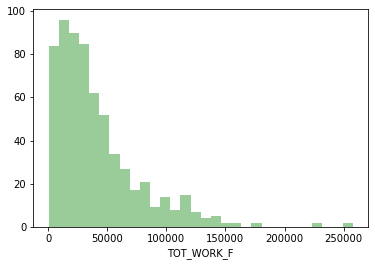

BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


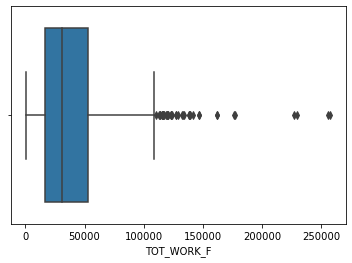

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MAINWORK_M
----------------------------------------------------------------------------
count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64 Distribution of MAINWORK_M
----------------------------------------------------------------------------


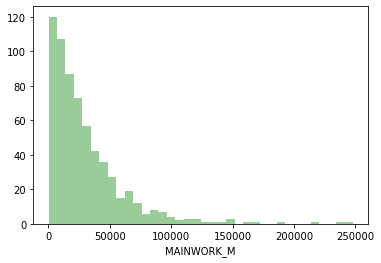

BoxPlot of MAINWORK_M
----------------------------------------------------------------------------


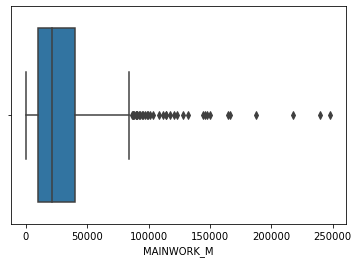

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MAINWORK_F
----------------------------------------------------------------------------
count       640.000000
mean      28198.846875
std       29998.262689
min         240.000000
25%        9502.250000
50%       18484.000000
75%       35063.250000
max      226166.000000
Name: MAINWORK_F, dtype: float64 Distribution of MAINWORK_F
----------------------------------------------------------------------------


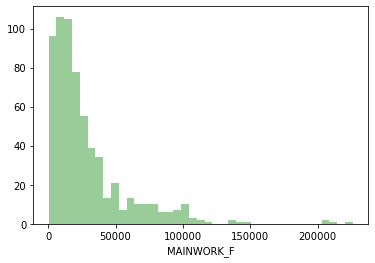

BoxPlot of MAINWORK_F
----------------------------------------------------------------------------


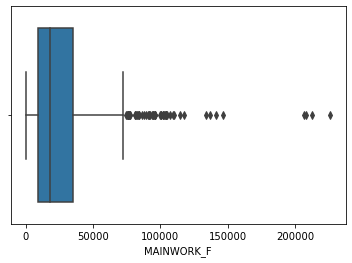

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MAIN_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      5424.342188
std       4739.161969
min          0.000000
25%       2023.500000
50%       4160.500000
75%       7695.000000
max      29113.000000
Name: MAIN_CL_M, dtype: float64 Distribution of MAIN_CL_M
----------------------------------------------------------------------------


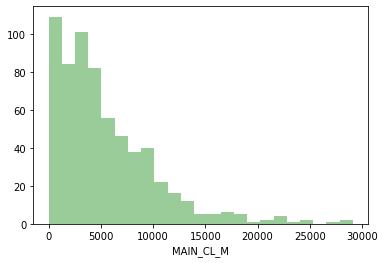

BoxPlot of MAIN_CL_M
----------------------------------------------------------------------------


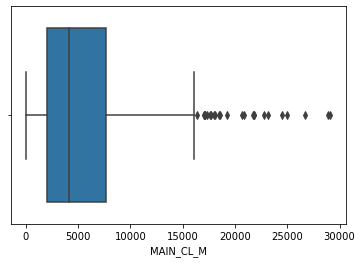

Description of MAIN_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      5486.042188
std       5326.362728
min          0.000000
25%       1920.250000
50%       3908.500000
75%       7286.250000
max      36193.000000
Name: MAIN_CL_F, dtype: float64 Distribution of MAIN_CL_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


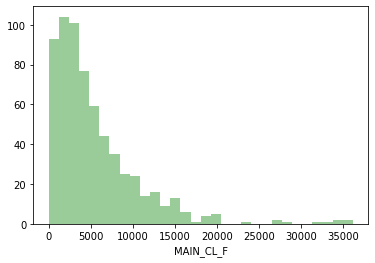

BoxPlot of MAIN_CL_F
----------------------------------------------------------------------------


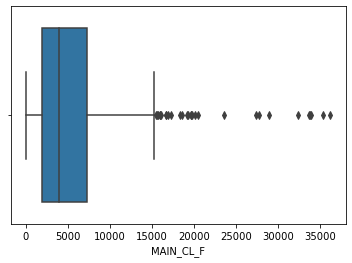

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MAIN_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      5849.109375
std       6399.507966
min          0.000000
25%       1070.250000
50%       3936.500000
75%       8067.250000
max      40843.000000
Name: MAIN_AL_M, dtype: float64 Distribution of MAIN_AL_M
----------------------------------------------------------------------------


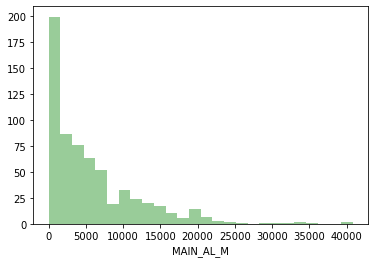

BoxPlot of MAIN_AL_M
----------------------------------------------------------------------------


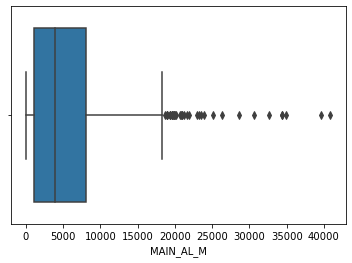

Description of MAIN_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      8925.995312
std      12864.287584
min          0.000000
25%       1408.750000
50%       3933.500000
75%      10617.500000
max      87945.000000
Name: MAIN_AL_F, dtype: float64 Distribution of MAIN_AL_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


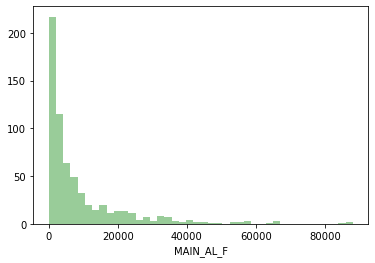

BoxPlot of MAIN_AL_F
----------------------------------------------------------------------------


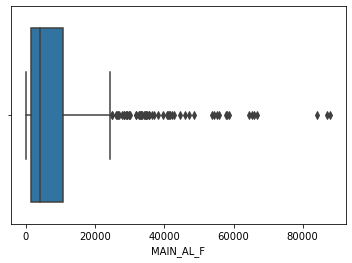

Description of MAIN_HH_M
----------------------------------------------------------------------------
count      640.000000
mean       883.893750
std       1278.642345
min          0.000000
25%        187.500000
50%        498.500000
75%       1099.250000
max      16429.000000
Name: MAIN_HH_M, dtype: float64 Distribution of MAIN_HH_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


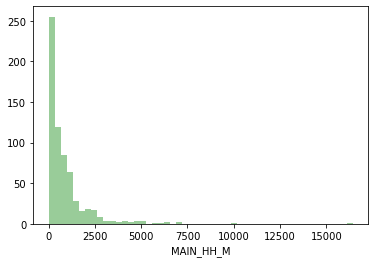

BoxPlot of MAIN_HH_M
----------------------------------------------------------------------------


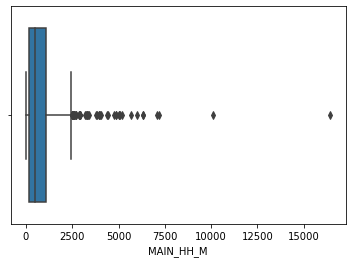

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MAIN_HH_F
----------------------------------------------------------------------------
count      640.000000
mean      1380.773438
std       3179.414449
min          0.000000
25%        248.750000
50%        540.500000
75%       1435.750000
max      45979.000000
Name: MAIN_HH_F, dtype: float64 Distribution of MAIN_HH_F
----------------------------------------------------------------------------


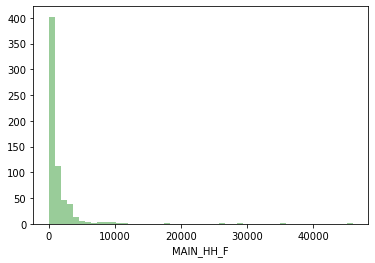

BoxPlot of MAIN_HH_F
----------------------------------------------------------------------------


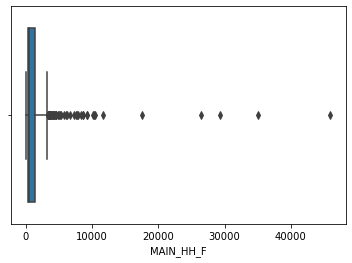

Description of MAIN_OT_M
----------------------------------------------------------------------------
count       640.000000
mean      18047.101562
std       26068.480886
min          36.000000
25%        3997.500000
50%        9598.000000
75%       21249.500000
max      240855.000000
Name: MAIN_OT_M, dtype: float64 Distribution of MAIN_OT_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


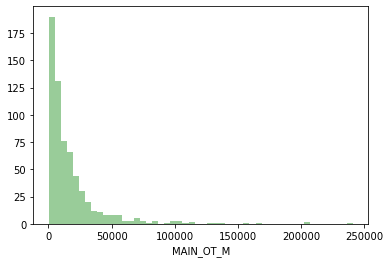

BoxPlot of MAIN_OT_M
----------------------------------------------------------------------------


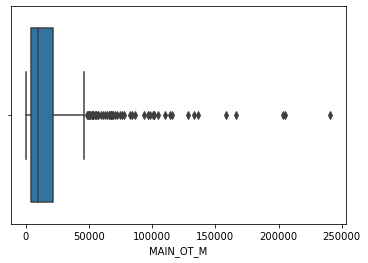

Description of MAIN_OT_F
----------------------------------------------------------------------------
count       640.000000
mean      12406.035938
std       18972.202369
min         153.000000
25%        3142.500000
50%        6380.500000
75%       14368.250000
max      209355.000000
Name: MAIN_OT_F, dtype: float64 Distribution of MAIN_OT_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


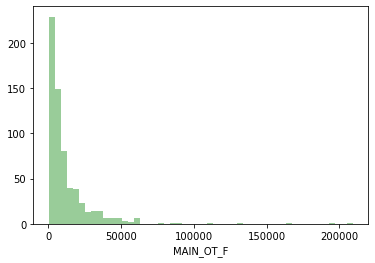

BoxPlot of MAIN_OT_F
----------------------------------------------------------------------------


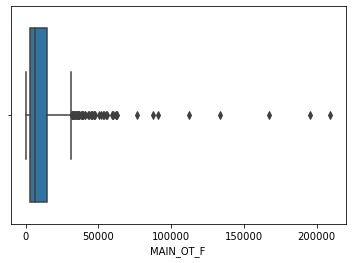

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARGWORK_M
----------------------------------------------------------------------------
count      640.000000
mean      7787.960938
std       7410.791691
min         35.000000
25%       2937.500000
50%       5627.000000
75%       9800.250000
max      47553.000000
Name: MARGWORK_M, dtype: float64 Distribution of MARGWORK_M
----------------------------------------------------------------------------


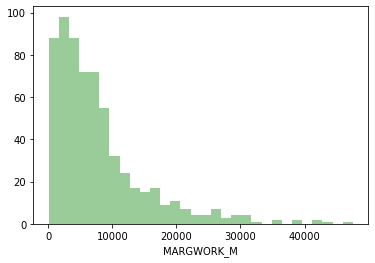

BoxPlot of MARGWORK_M
----------------------------------------------------------------------------


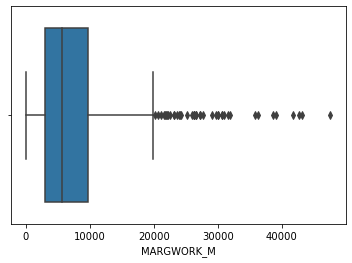

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARGWORK_F
----------------------------------------------------------------------------
count      640.000000
mean     13096.914062
std      10996.474528
min        117.000000
25%       5424.500000
50%      10175.000000
75%      18879.250000
max      66915.000000
Name: MARGWORK_F, dtype: float64 Distribution of MARGWORK_F
----------------------------------------------------------------------------


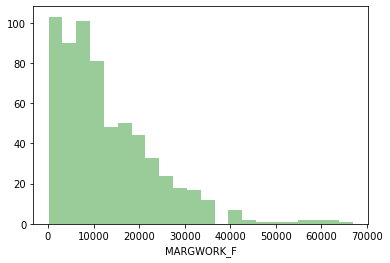

BoxPlot of MARGWORK_F
----------------------------------------------------------------------------


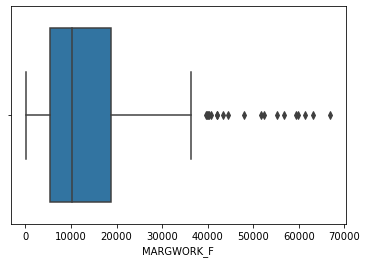

Description of MARG_CL_M
----------------------------------------------------------------------------
count      640.000000
mean      1040.737500
std       1311.546847
min          0.000000
25%        311.750000
50%        606.500000
75%       1281.000000
max      13201.000000
Name: MARG_CL_M, dtype: float64 Distribution of MARG_CL_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


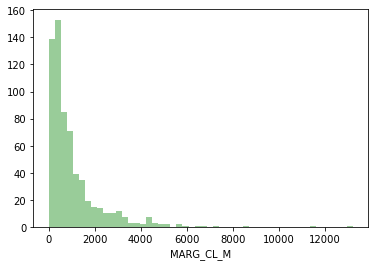

BoxPlot of MARG_CL_M
----------------------------------------------------------------------------


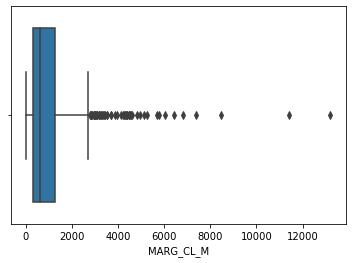

Description of MARG_CL_F
----------------------------------------------------------------------------
count      640.000000
mean      2307.682813
std       3564.626095
min          0.000000
25%        630.250000
50%       1226.000000
75%       2659.250000
max      44324.000000
Name: MARG_CL_F, dtype: float64 Distribution of MARG_CL_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


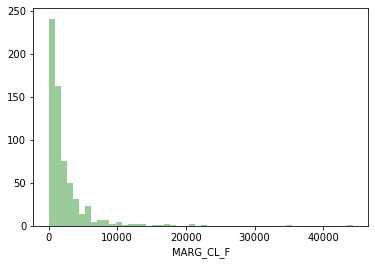

BoxPlot of MARG_CL_F
----------------------------------------------------------------------------


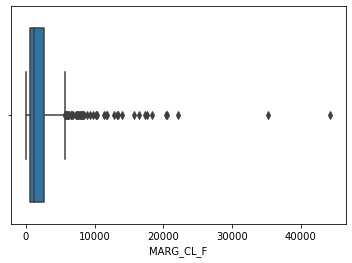

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_AL_M
----------------------------------------------------------------------------
count      640.000000
mean      3304.326562
std       3781.555707
min          0.000000
25%        873.500000
50%       2062.000000
75%       4300.750000
max      23719.000000
Name: MARG_AL_M, dtype: float64 Distribution of MARG_AL_M
----------------------------------------------------------------------------


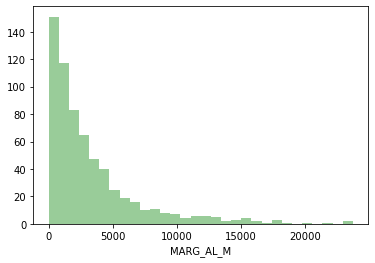

BoxPlot of MARG_AL_M
----------------------------------------------------------------------------


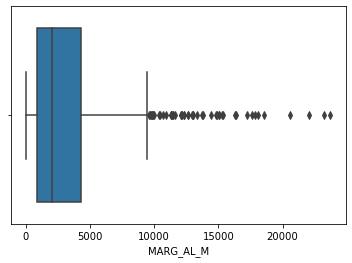

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_AL_F
----------------------------------------------------------------------------
count      640.000000
mean      6463.281250
std       6773.876298
min          0.000000
25%       1402.500000
50%       4020.500000
75%       9089.250000
max      45301.000000
Name: MARG_AL_F, dtype: float64 Distribution of MARG_AL_F
----------------------------------------------------------------------------


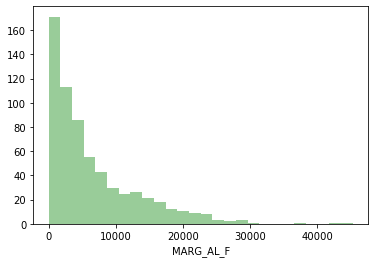

BoxPlot of MARG_AL_F
----------------------------------------------------------------------------


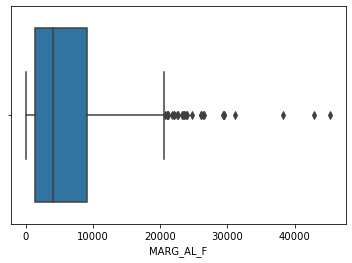

Description of MARG_HH_M
----------------------------------------------------------------------------
count     640.000000
mean      316.742188
std       462.661891
min         0.000000
25%        71.750000
50%       166.000000
75%       356.500000
max      4298.000000
Name: MARG_HH_M, dtype: float64 Distribution of MARG_HH_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


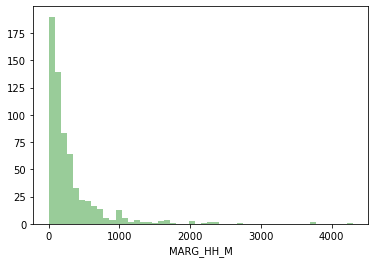

BoxPlot of MARG_HH_M
----------------------------------------------------------------------------


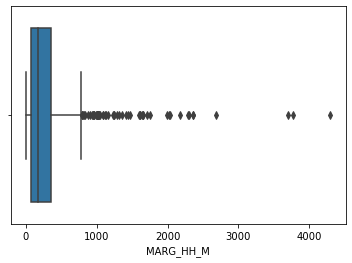

Description of MARG_HH_F
----------------------------------------------------------------------------
count      640.000000
mean       786.626562
std       1198.718213
min          0.000000
25%        171.750000
50%        429.000000
75%        962.500000
max      15448.000000
Name: MARG_HH_F, dtype: float64 Distribution of MARG_HH_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


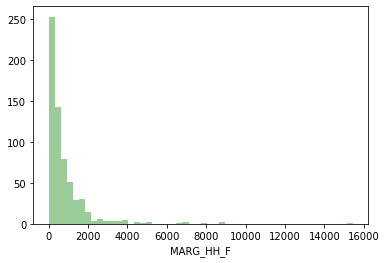

BoxPlot of MARG_HH_F
----------------------------------------------------------------------------


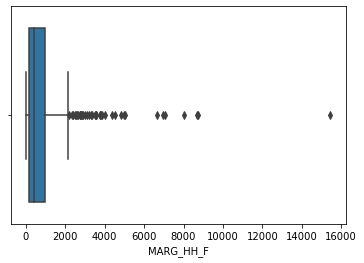

Description of MARG_OT_M
----------------------------------------------------------------------------
count      640.000000
mean      3126.154687
std       3609.391821
min          7.000000
25%        935.500000
50%       2036.000000
75%       3985.250000
max      24728.000000
Name: MARG_OT_M, dtype: float64 Distribution of MARG_OT_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


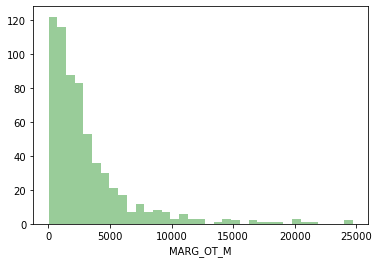

BoxPlot of MARG_OT_M
----------------------------------------------------------------------------


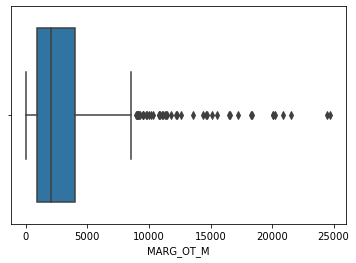

Description of MARG_OT_F
----------------------------------------------------------------------------
count      640.000000
mean      3539.323438
std       4115.191314
min         19.000000
25%       1071.750000
50%       2349.500000
75%       4400.500000
max      36377.000000
Name: MARG_OT_F, dtype: float64 Distribution of MARG_OT_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


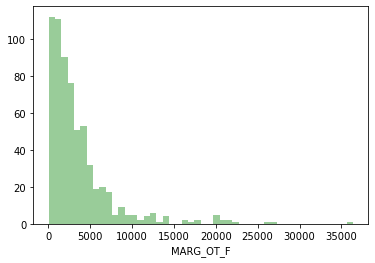

BoxPlot of MARG_OT_F
----------------------------------------------------------------------------


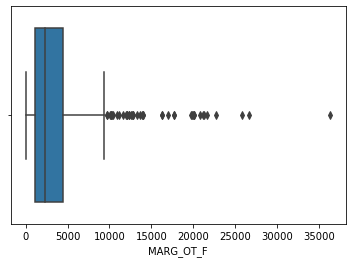

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARGWORK_3_6_M
----------------------------------------------------------------------------
count       640.000000
mean      41948.168750
std       39045.316918
min         291.000000
25%       16208.250000
50%       30315.000000
75%       57218.750000
max      300937.000000
Name: MARGWORK_3_6_M, dtype: float64 Distribution of MARGWORK_3_6_M
----------------------------------------------------------------------------


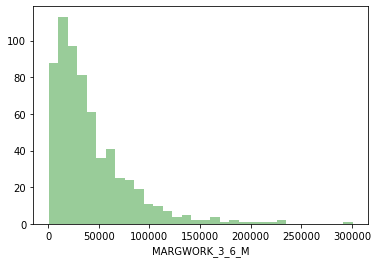

BoxPlot of MARGWORK_3_6_M
----------------------------------------------------------------------------


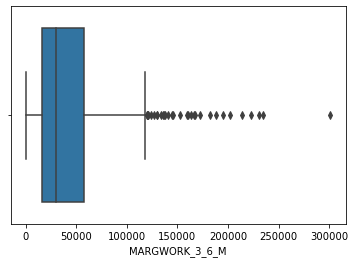

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARGWORK_3_6_F
----------------------------------------------------------------------------
count       640.000000
mean      81076.323438
std       82970.406216
min         341.000000
25%       26619.500000
50%       56793.000000
75%      107924.000000
max      676450.000000
Name: MARGWORK_3_6_F, dtype: float64 Distribution of MARGWORK_3_6_F
----------------------------------------------------------------------------


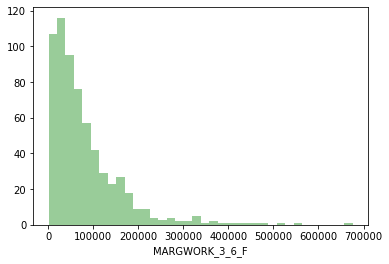

BoxPlot of MARGWORK_3_6_F
----------------------------------------------------------------------------


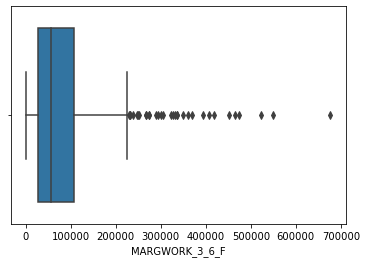

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_CL_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      6394.987500
std       6019.806644
min         27.000000
25%       2372.000000
50%       4630.000000
75%       8167.000000
max      39106.000000
Name: MARG_CL_3_6_M, dtype: float64 Distribution of MARG_CL_3_6_M
----------------------------------------------------------------------------


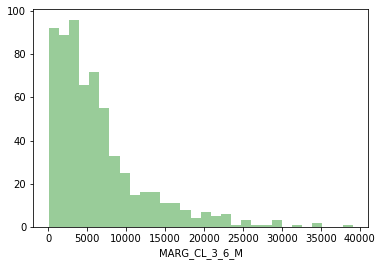

BoxPlot of MARG_CL_3_6_M
----------------------------------------------------------------------------


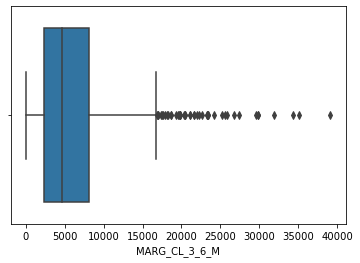

Description of MARG_CL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean     10339.864063
std       8467.473429
min         85.000000
25%       4351.500000
50%       8295.000000
75%      15102.000000
max      50065.000000
Name: MARG_CL_3_6_F, dtype: float64 Distribution of MARG_CL_3_6_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


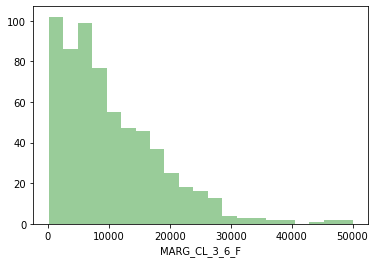

BoxPlot of MARG_CL_3_6_F
----------------------------------------------------------------------------


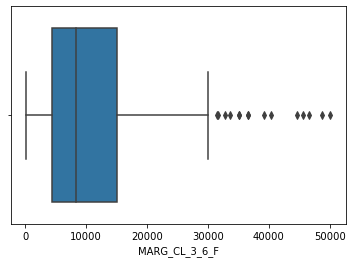

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_AL_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      789.848438
std       905.639279
min         0.000000
25%       235.500000
50%       480.500000
75%       986.000000
max      7426.000000
Name: MARG_AL_3_6_M, dtype: float64 Distribution of MARG_AL_3_6_M
----------------------------------------------------------------------------


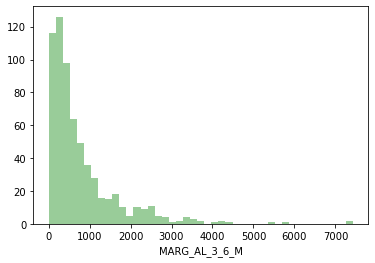

BoxPlot of MARG_AL_3_6_M
----------------------------------------------------------------------------


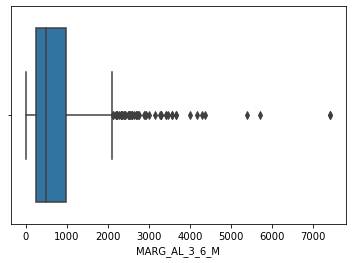

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_AL_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean      1749.584375
std       2496.541514
min          0.000000
25%        497.250000
50%        985.500000
75%       2059.000000
max      27171.000000
Name: MARG_AL_3_6_F, dtype: float64 Distribution of MARG_AL_3_6_F
----------------------------------------------------------------------------


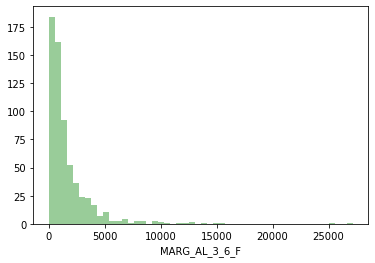

BoxPlot of MARG_AL_3_6_F
----------------------------------------------------------------------------


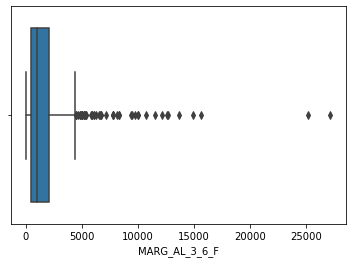

Description of MARG_HH_3_6_M
----------------------------------------------------------------------------
count      640.000000
mean      2743.635938
std       3059.586387
min          0.000000
25%        718.750000
50%       1714.500000
75%       3702.250000
max      19343.000000
Name: MARG_HH_3_6_M, dtype: float64 Distribution of MARG_HH_3_6_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


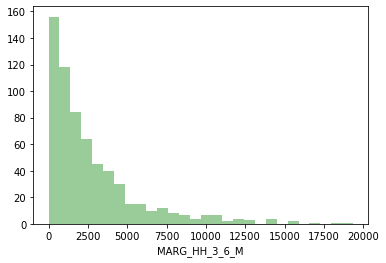

BoxPlot of MARG_HH_3_6_M
----------------------------------------------------------------------------


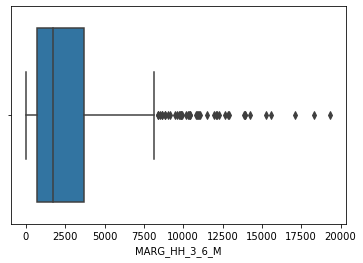

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_HH_3_6_F
----------------------------------------------------------------------------
count      640.00000
mean      5169.85000
std       5335.64096
min          0.00000
25%       1113.75000
50%       3294.00000
75%       7502.25000
max      36253.00000
Name: MARG_HH_3_6_F, dtype: float64 Distribution of MARG_HH_3_6_F
----------------------------------------------------------------------------


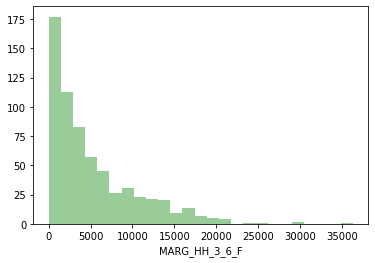

BoxPlot of MARG_HH_3_6_F
----------------------------------------------------------------------------


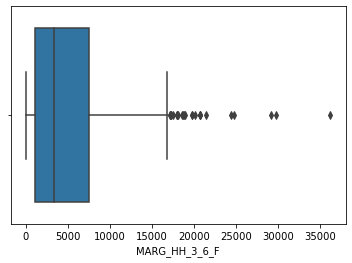

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_OT_3_6_M
----------------------------------------------------------------------------
count     640.000000
mean      245.362500
std       358.728567
min         0.000000
25%        58.000000
50%       129.500000
75%       276.000000
max      3535.000000
Name: MARG_OT_3_6_M, dtype: float64 Distribution of MARG_OT_3_6_M
----------------------------------------------------------------------------


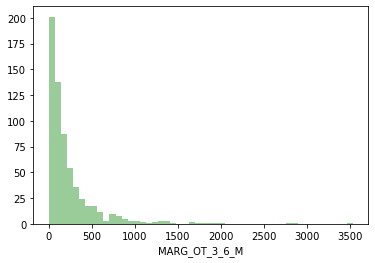

BoxPlot of MARG_OT_3_6_M
----------------------------------------------------------------------------


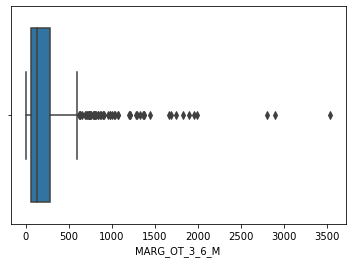

Description of MARG_OT_3_6_F
----------------------------------------------------------------------------
count      640.000000
mean       585.884375
std        900.025817
min          0.000000
25%        127.750000
50%        320.500000
75%        719.250000
max      12094.000000
Name: MARG_OT_3_6_F, dtype: float64 Distribution of MARG_OT_3_6_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


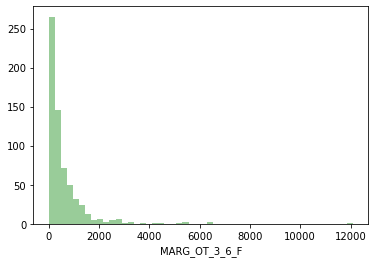

BoxPlot of MARG_OT_3_6_F
----------------------------------------------------------------------------


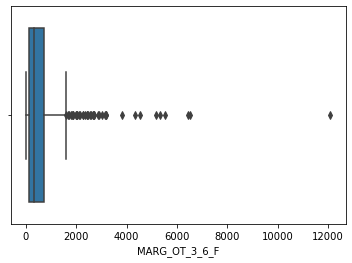

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARGWORK_0_3_M
----------------------------------------------------------------------------
count      640.000000
mean      2616.140625
std       3036.964381
min          7.000000
25%        755.000000
50%       1681.500000
75%       3320.250000
max      20648.000000
Name: MARGWORK_0_3_M, dtype: float64 Distribution of MARGWORK_0_3_M
----------------------------------------------------------------------------


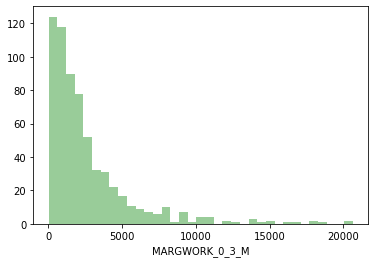

BoxPlot of MARGWORK_0_3_M
----------------------------------------------------------------------------


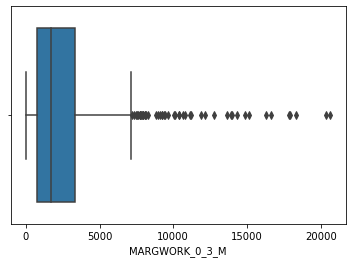

Description of MARGWORK_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2834.545312
std       3327.836932
min         14.000000
25%        833.500000
50%       1834.500000
75%       3610.500000
max      25844.000000
Name: MARGWORK_0_3_F, dtype: float64 Distribution of MARGWORK_0_3_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


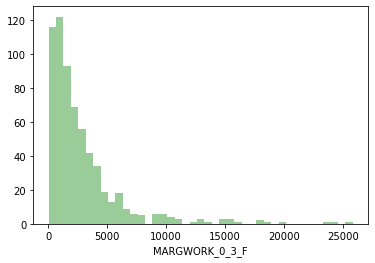

BoxPlot of MARGWORK_0_3_F
----------------------------------------------------------------------------


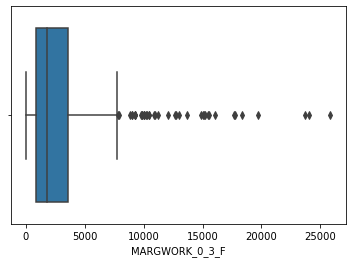

Description of MARG_CL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean     1392.973438
std      1489.707052
min         4.000000
25%       489.500000
50%       949.000000
75%      1714.000000
max      9875.000000
Name: MARG_CL_0_3_M, dtype: float64 Distribution of MARG_CL_0_3_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


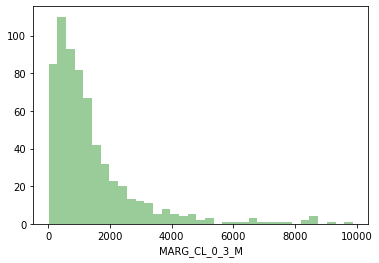

BoxPlot of MARG_CL_0_3_M
----------------------------------------------------------------------------


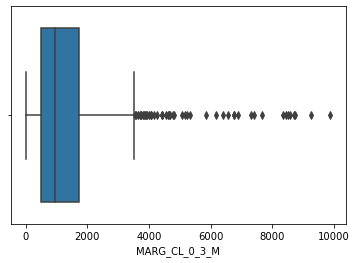

Description of MARG_CL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      2757.050000
std       2788.776676
min         30.000000
25%        957.250000
50%       1928.000000
75%       3599.750000
max      21611.000000
Name: MARG_CL_0_3_F, dtype: float64 Distribution of MARG_CL_0_3_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


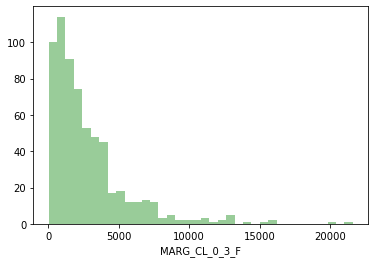

BoxPlot of MARG_CL_0_3_F
----------------------------------------------------------------------------


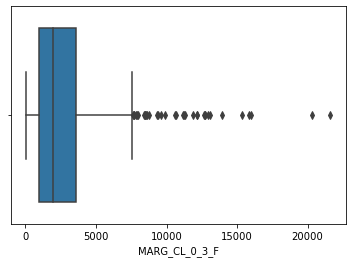

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_AL_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      250.889062
std       453.336594
min         0.000000
25%        47.000000
50%       114.500000
75%       270.750000
max      5775.000000
Name: MARG_AL_0_3_M, dtype: float64 Distribution of MARG_AL_0_3_M
----------------------------------------------------------------------------


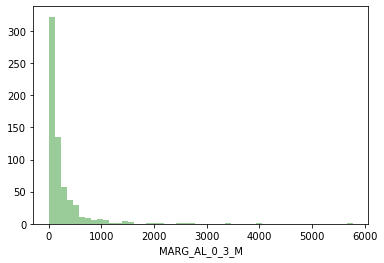

BoxPlot of MARG_AL_0_3_M
----------------------------------------------------------------------------


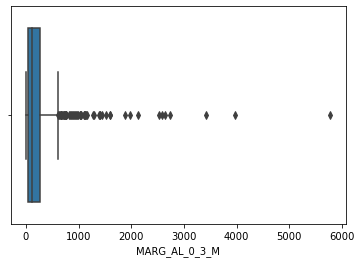

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_AL_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean       558.098438
std       1117.642748
min          0.000000
25%        109.000000
50%        247.500000
75%        568.750000
max      17153.000000
Name: MARG_AL_0_3_F, dtype: float64 Distribution of MARG_AL_0_3_F
----------------------------------------------------------------------------


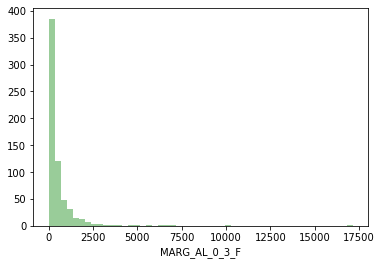

BoxPlot of MARG_AL_0_3_F
----------------------------------------------------------------------------


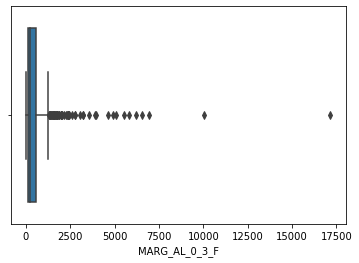

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_HH_0_3_M
----------------------------------------------------------------------------
count     640.000000
mean      560.690625
std       762.578991
min         0.000000
25%       136.500000
50%       308.000000
75%       642.000000
max      6116.000000
Name: MARG_HH_0_3_M, dtype: float64 Distribution of MARG_HH_0_3_M
----------------------------------------------------------------------------


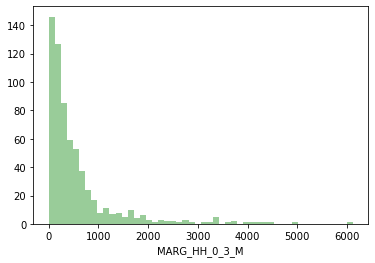

BoxPlot of MARG_HH_0_3_M
----------------------------------------------------------------------------


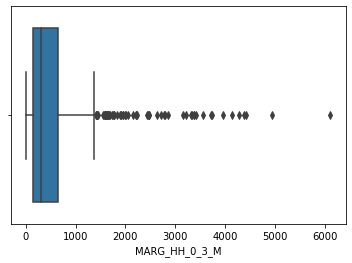

Description of MARG_HH_0_3_F
----------------------------------------------------------------------------
count      640.000000
mean      1293.431250
std       1585.377936
min          0.000000
25%        298.000000
50%        717.000000
75%       1710.750000
max      13714.000000
Name: MARG_HH_0_3_F, dtype: float64 Distribution of MARG_HH_0_3_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


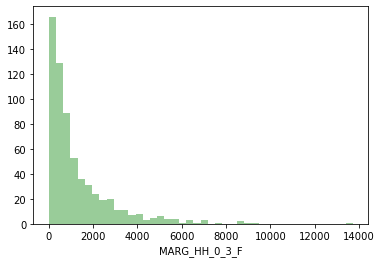

BoxPlot of MARG_HH_0_3_F
----------------------------------------------------------------------------


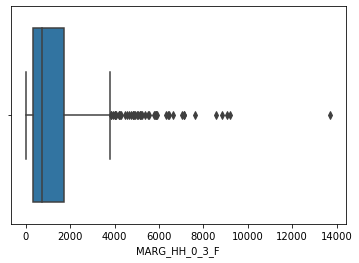

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of MARG_OT_0_3_M
----------------------------------------------------------------------------
count    640.000000
mean      71.379688
std      107.897627
min        0.000000
25%       14.000000
50%       35.000000
75%       79.000000
max      895.000000
Name: MARG_OT_0_3_M, dtype: float64 Distribution of MARG_OT_0_3_M
----------------------------------------------------------------------------


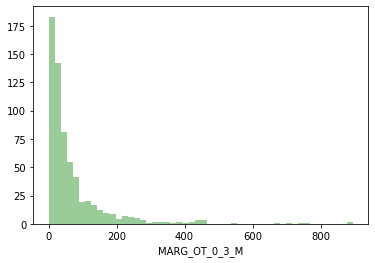

BoxPlot of MARG_OT_0_3_M
----------------------------------------------------------------------------


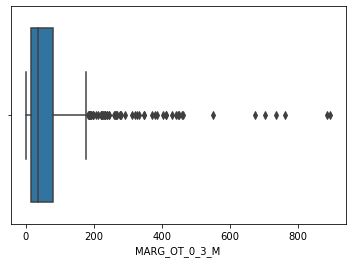

Description of MARG_OT_0_3_F
----------------------------------------------------------------------------
count     640.000000
mean      200.742188
std       309.740854
min         0.000000
25%        43.000000
50%       113.000000
75%       240.000000
max      3354.000000
Name: MARG_OT_0_3_F, dtype: float64 Distribution of MARG_OT_0_3_F
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


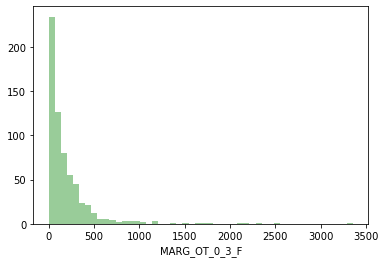

BoxPlot of MARG_OT_0_3_F
----------------------------------------------------------------------------


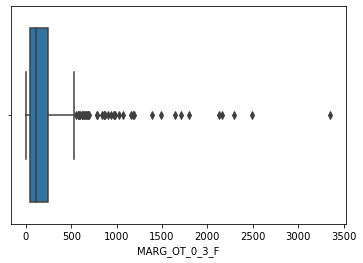

Description of NON_WORK_M
----------------------------------------------------------------------------
count     640.000000
mean      510.014063
std       610.603187
min         0.000000
25%       161.000000
50%       326.000000
75%       604.500000
max      6456.000000
Name: NON_WORK_M, dtype: float64 Distribution of NON_WORK_M
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


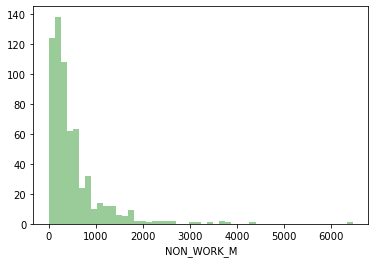

BoxPlot of NON_WORK_M
----------------------------------------------------------------------------


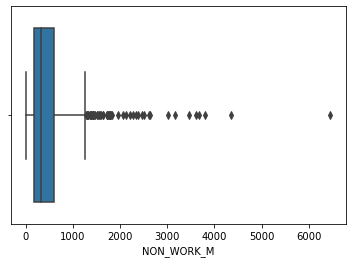

D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of NON_WORK_F
----------------------------------------------------------------------------
count      640.000000
mean       704.778125
std        910.209225
min          5.000000
25%        220.500000
50%        464.500000
75%        853.500000
max      10533.000000
Name: NON_WORK_F, dtype: float64 Distribution of NON_WORK_F
----------------------------------------------------------------------------


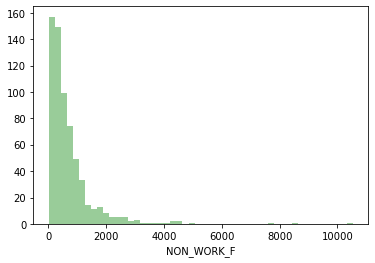

BoxPlot of NON_WORK_F
----------------------------------------------------------------------------


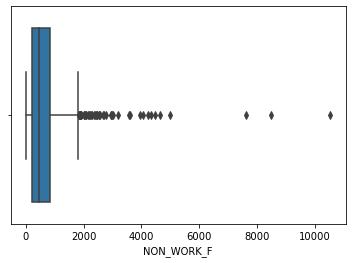

Description of gender_ratio
----------------------------------------------------------------------------
count    640.000000
mean       0.656989
std        0.091598
min        0.437972
25%        0.586734
50%        0.658796
75%        0.730230
max        0.868061
Name: gender_ratio, dtype: float64 Distribution of gender_ratio
----------------------------------------------------------------------------


D:\softwares\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


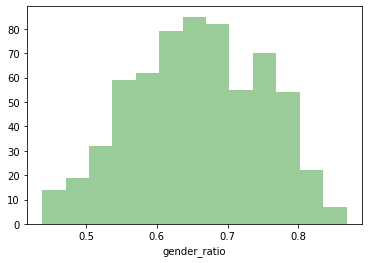

BoxPlot of gender_ratio
----------------------------------------------------------------------------


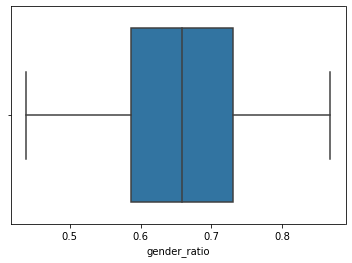

In [22]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

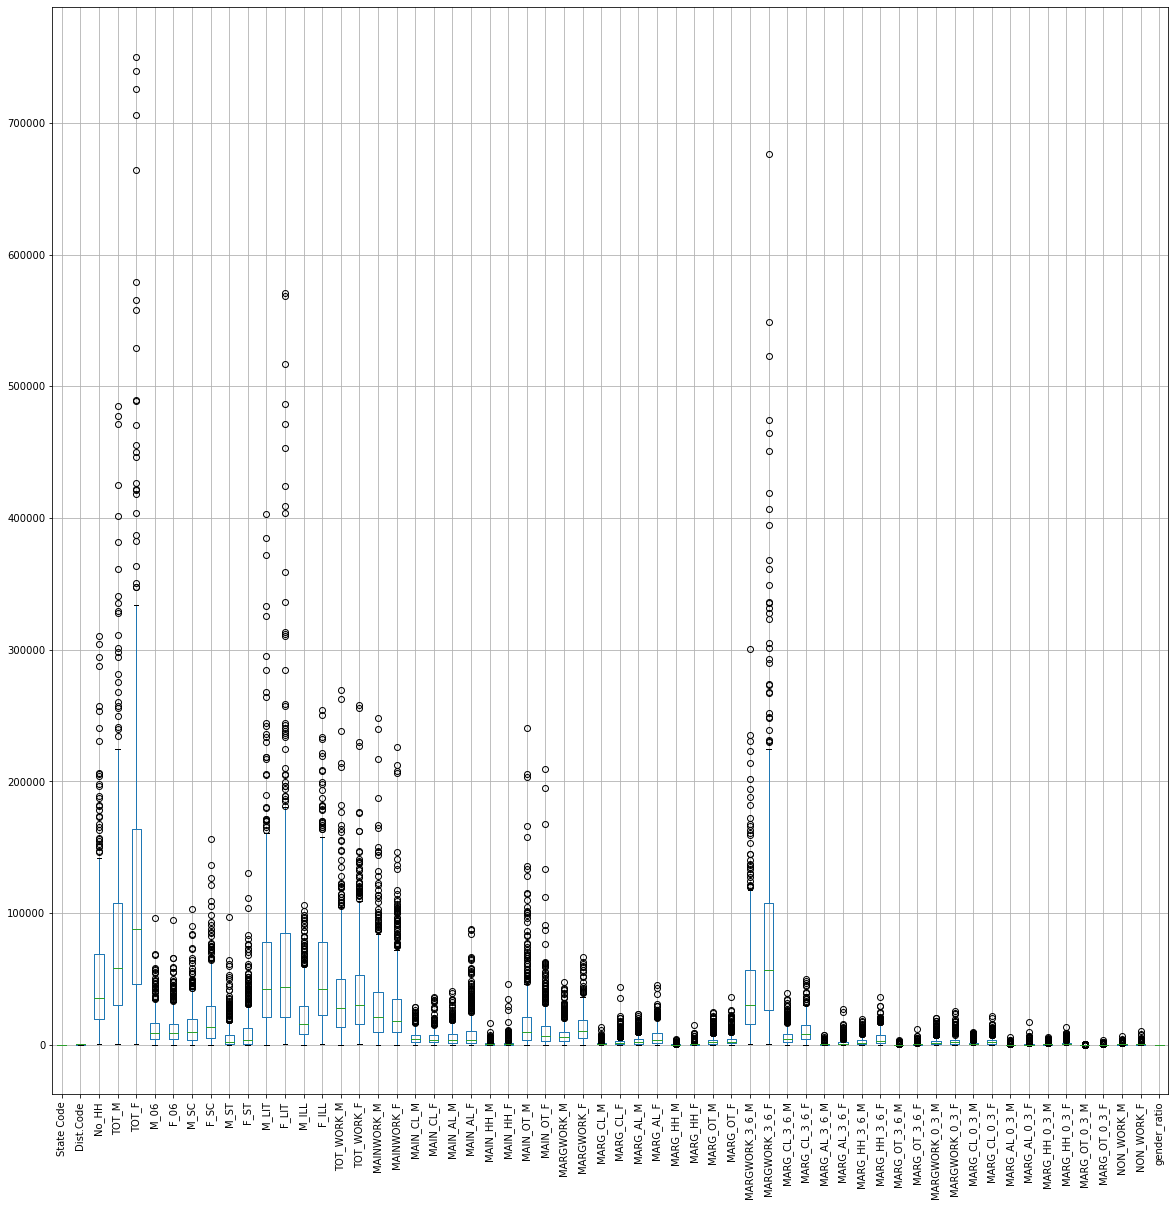

In [23]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

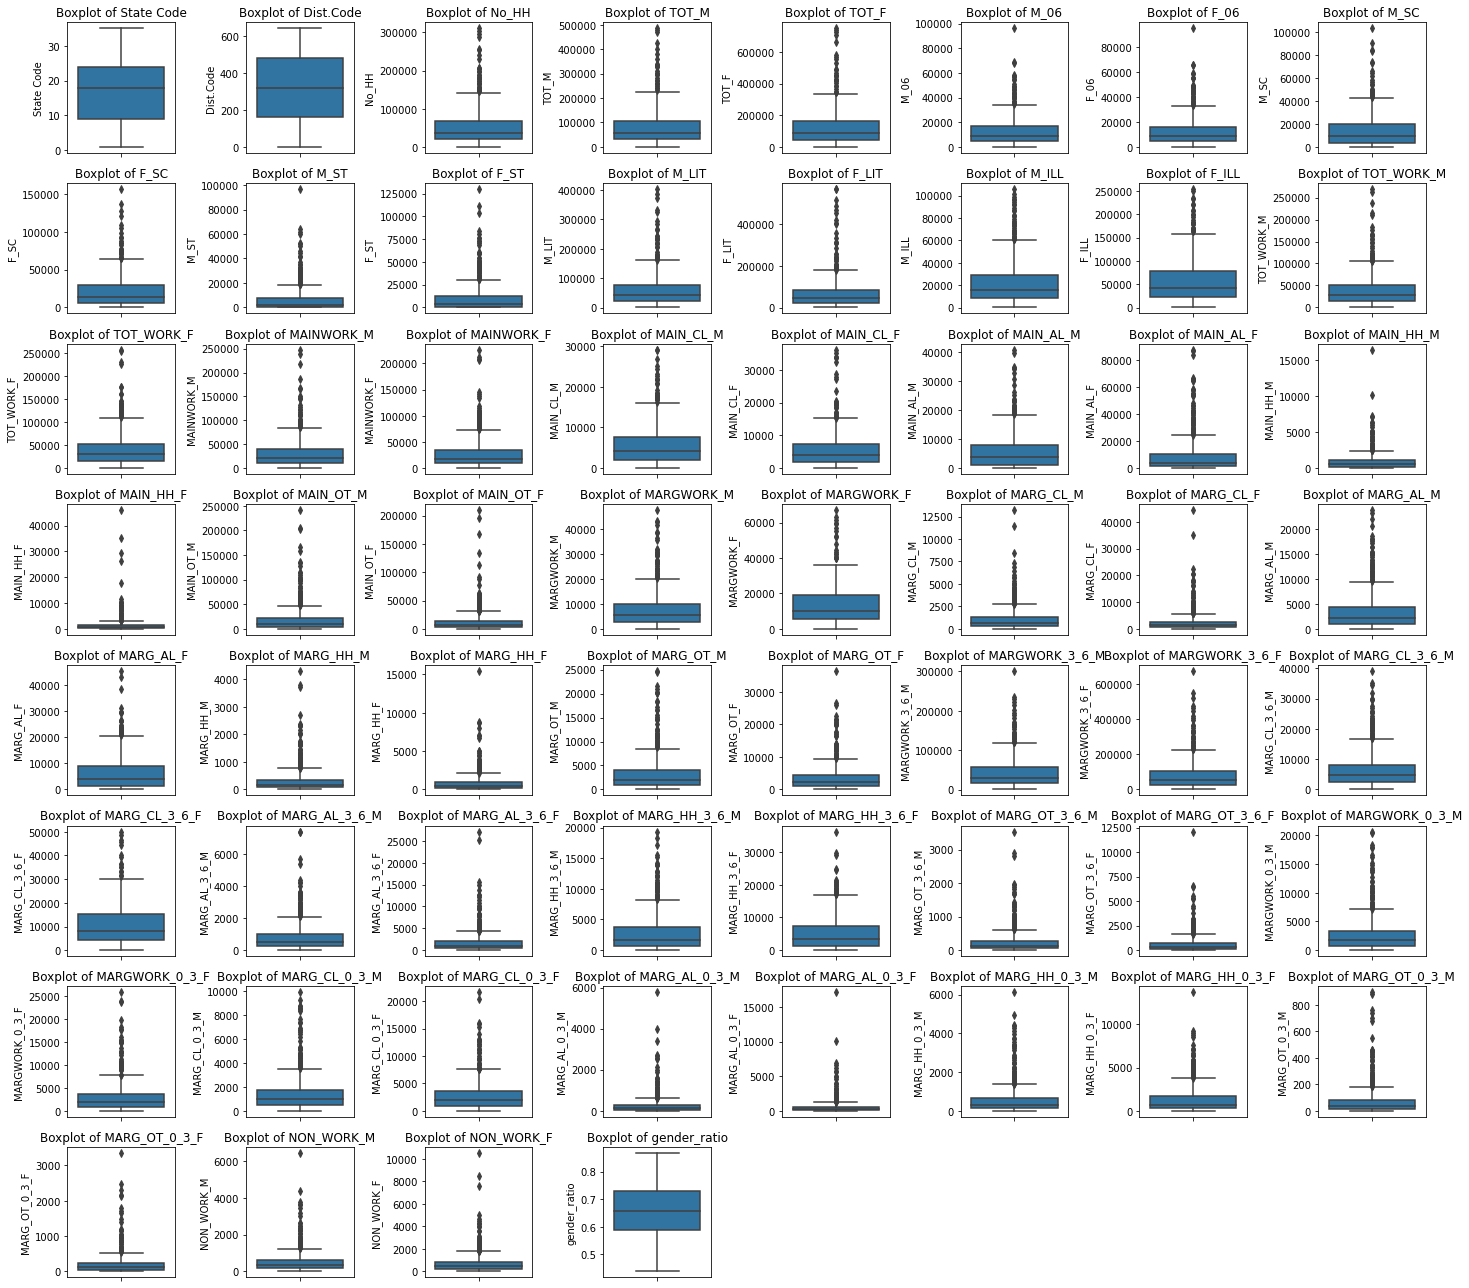

In [26]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,18))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(8,8,i+1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [27]:
df1_data_scaled = data.apply(zscore)

In [28]:
df1_data_scaled.head().T

,0,1,2,3,4
State Code,-1.710782,-1.710782,-1.710782,-1.710782,-1.710782
Dist.Code,-1.729347,-1.723934,-1.718521,-1.713109,-1.707696
No_HH,-0.904738,-0.935695,-0.972412,-1.037530,-0.822676
TOT_M,-0.771236,-0.823100,-1.000919,-1.052224,-0.809381
TOT_F,-0.815563,-0.874534,-0.981466,-1.041001,-0.813933
M_06,-0.561012,-0.681096,-0.976956,-1.022118,-0.622359
F_06,-0.507738,-0.725367,-0.965262,-0.995393,-0.649908
M_SC,-0.958575,-0.958297,-0.958575,-0.958783,-0.957395
F_SC,-0.957049,-0.956772,-0.956772,-0.957049,-0.955529
M_ST,-0.423306,-0.582014,-0.038951,-0.355965,0.149238


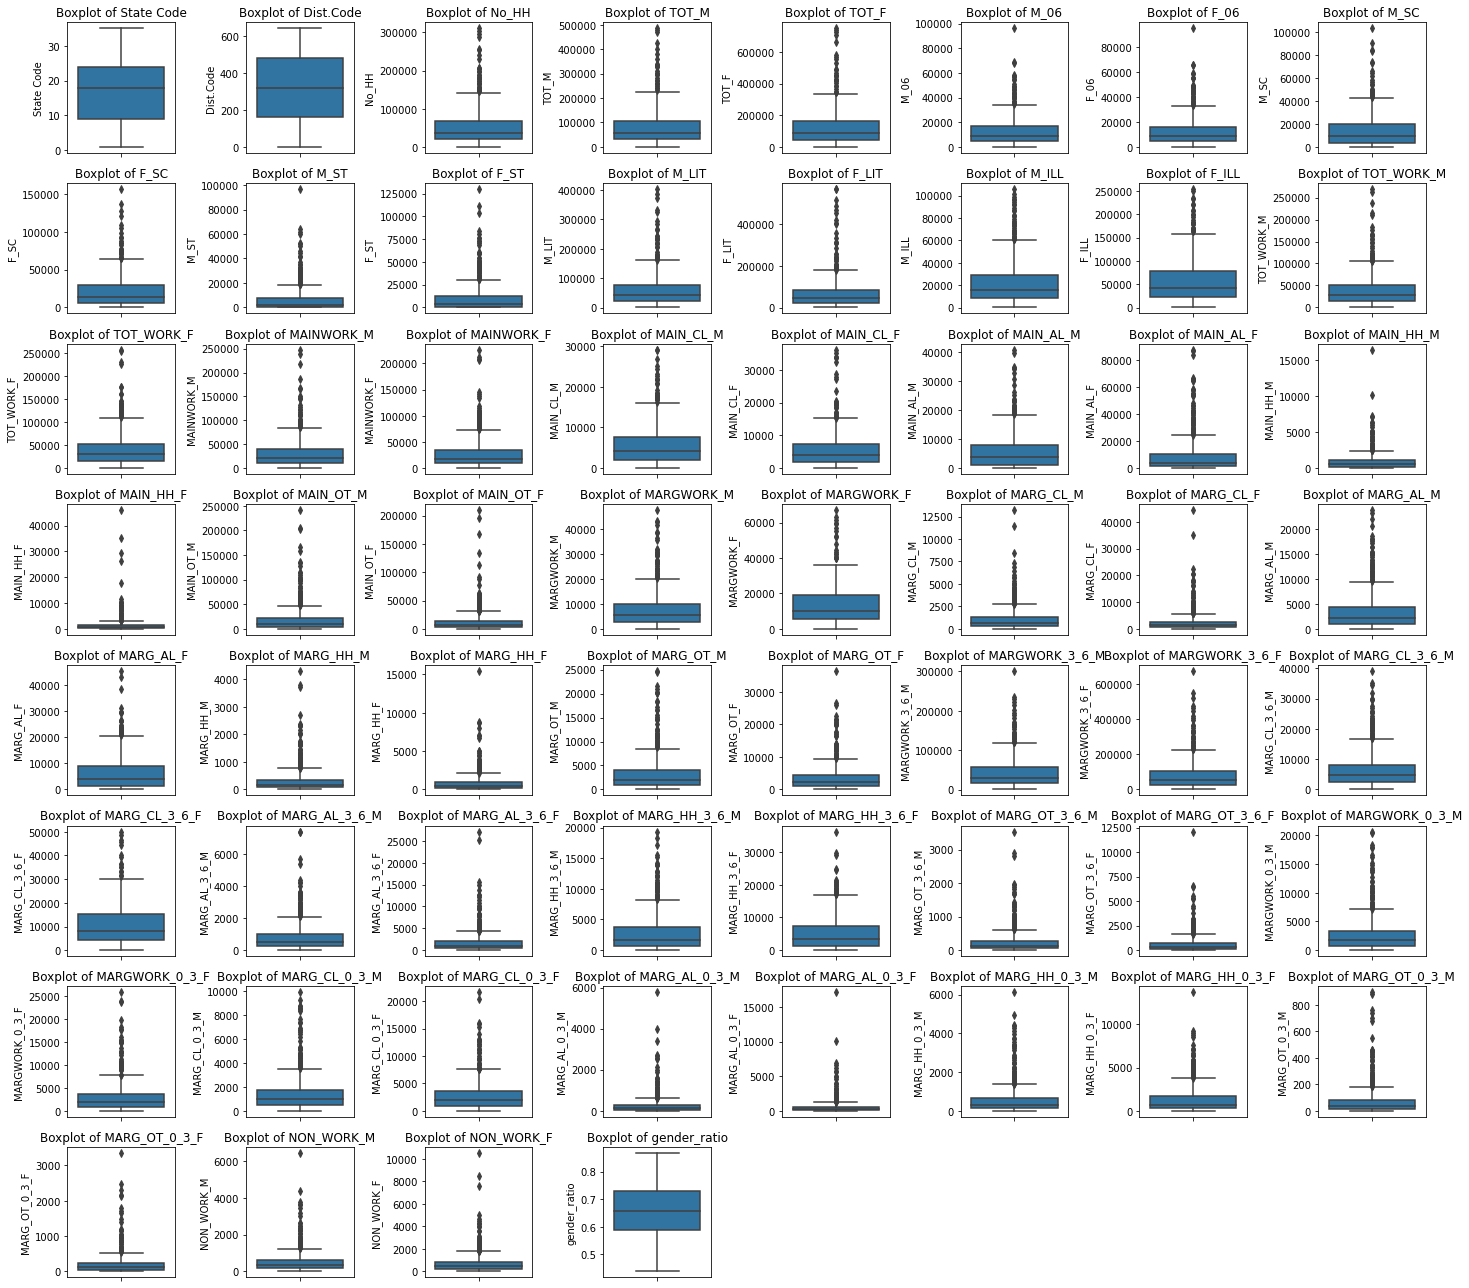

In [29]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,18))
feature_list = df1_data_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(8,8,i+1)
    sns.boxplot(y = data[feature_list[i]], data = df1_data_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [30]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [31]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(data[i])
    data[i] = np.where(data[i] > UL, UL, data[i])
    data[i] = np.where(data[i] < LL, LL, data[i])

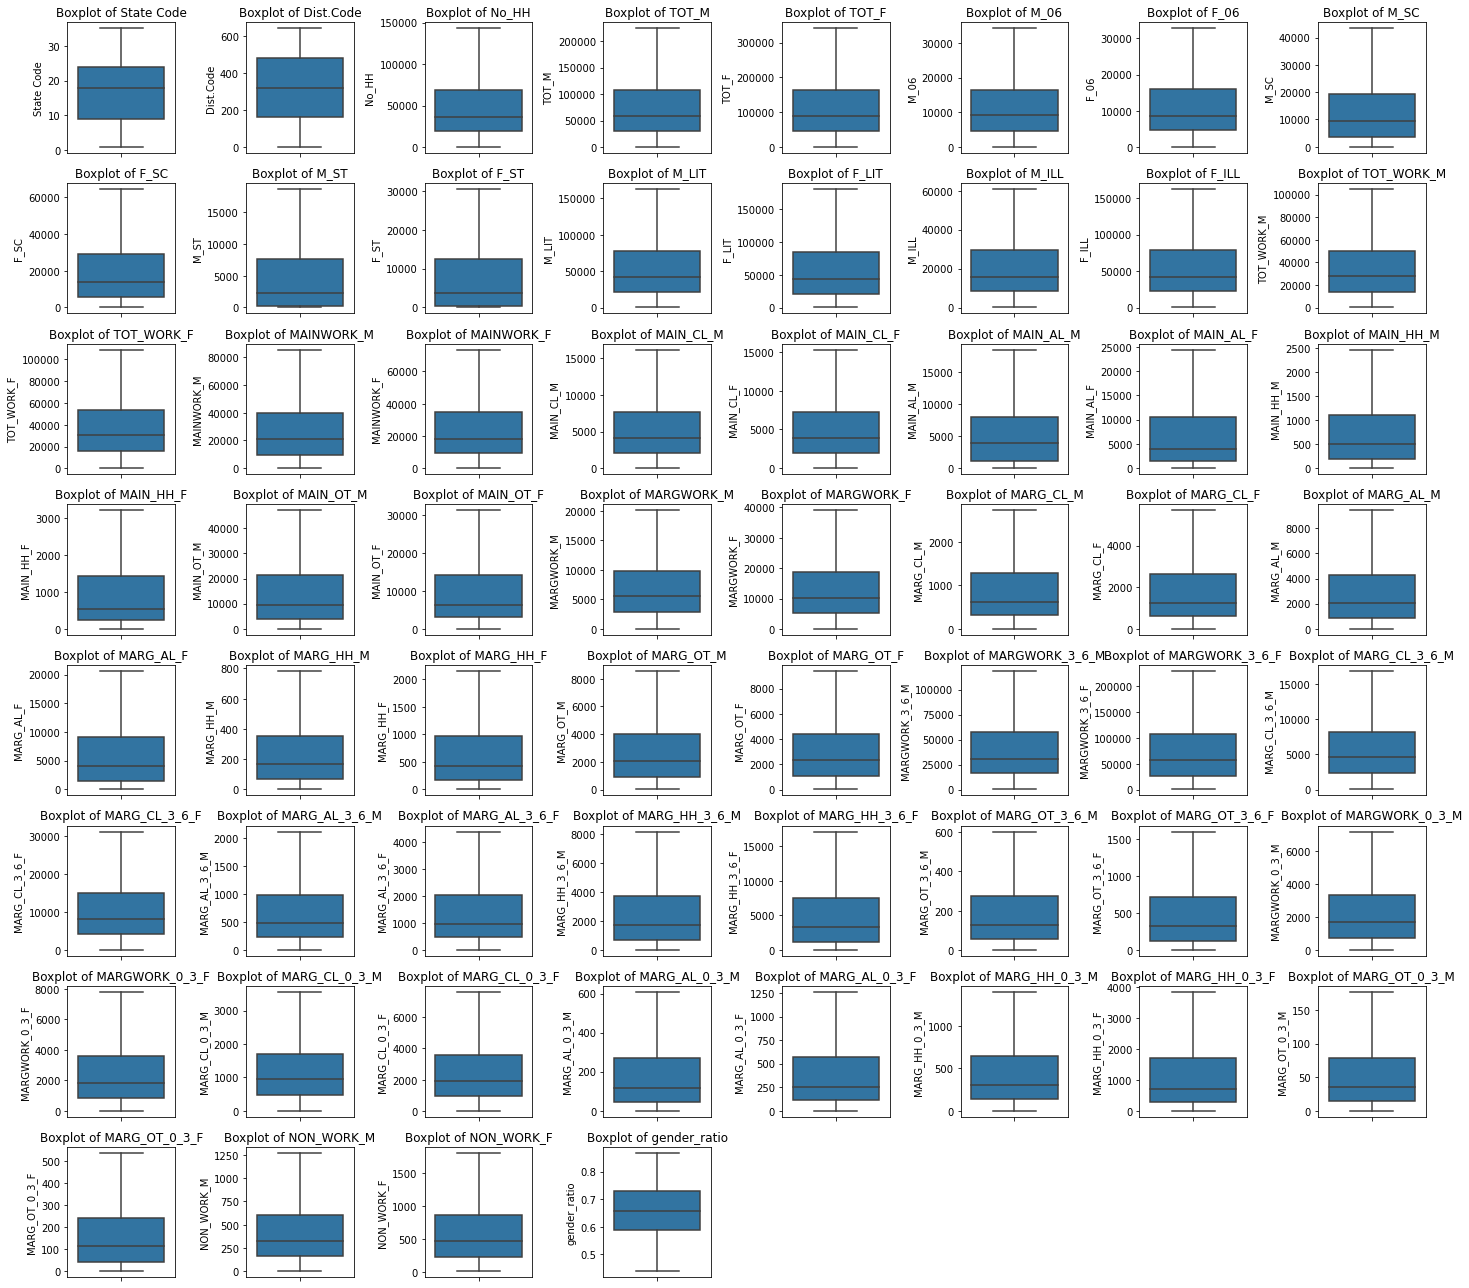

In [32]:
#Check to verify if outliers have been treated
plt.figure(figsize = (20,18))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(8, 8, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [33]:
df1_data_scaled = data.apply(zscore)
df1_data_scaled.head().T



,0,1,2,3,4
State Code,-1.710782,-1.710782,-1.710782,-1.710782,-1.710782
Dist.Code,-1.729347,-1.723934,-1.718521,-1.713109,-1.707696
No_HH,-1.038986,-1.076896,-1.121858,-1.201599,-0.938495
TOT_M,-0.874837,-0.938023,-1.154665,-1.217171,-0.921309
TOT_F,-0.937027,-1.009723,-1.141539,-1.214930,-0.935018
M_06,-0.624685,-0.773932,-1.141642,-1.197772,-0.700931
F_06,-0.561282,-0.835657,-1.138104,-1.176091,-0.740523
M_SC,-1.080201,-1.079873,-1.080201,-1.080447,-1.078807
F_SC,-1.079963,-1.079635,-1.079635,-1.079963,-1.078160
M_ST,-0.510440,-0.771833,0.122588,-0.399531,0.432534


In [48]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.000000,9.000000,18.000000,24.00000,35.000000
Dist.Code,640.0,320.500000,184.896367,1.000000,160.750000,320.500000,480.25000,640.000000
No_HH,640.0,48515.542188,39308.008223,350.000000,19484.000000,35837.000000,68892.00000,143004.000000
TOT_M,640.0,76041.601953,60233.862106,391.000000,30228.000000,58339.000000,107918.50000,224454.250000
TOT_F,640.0,116079.808594,92154.544396,698.000000,46517.750000,87724.500000,164251.75000,340852.750000
M_06,640.0,11638.096875,9253.649941,56.000000,4733.750000,9159.000000,16520.25000,34200.000000
F_06,640.0,11234.508203,8983.799265,56.000000,4672.250000,8663.000000,15902.25000,32747.250000
M_SC,640.0,13173.196875,12201.892925,0.000000,3466.250000,9591.500000,19429.75000,43375.000000
F_SC,640.0,19764.365039,18315.276108,0.000000,5603.250000,13709.000000,29180.00000,64545.125000
M_ST,640.0,5068.761133,6018.652465,0.000000,293.750000,2333.500000,7658.00000,18704.375000


In [49]:
!pip install factor_analyzer

In [50]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1_data_scaled)
p_value

0.0

In [51]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [52]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1_data_scaled)
kmo_model

D:\softwares\jupyter\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9352545920390632

In [34]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=59, random_state=123)
df_pca = pca.fit_transform(df1_data_scaled)
df_pca.transpose() # Component output

array([[-5.61628111e+00, -5.57313665e+00, -7.57704094e+00, ...,
        -7.77592841e+00, -7.74755394e+00, -7.29739741e+00],
       [ 1.26369891e+00,  8.71572869e-01,  2.85877130e-01, ...,
        -1.68278723e+00, -1.62131313e+00, -1.99843503e+00],
       [-2.45892952e+00, -3.23997259e+00, -8.85767599e-01, ...,
         4.14374634e-01,  2.44717487e-01,  9.34912403e-02],
       ...,
       [-3.75977968e-04, -6.79235660e-03, -1.26023314e-03, ...,
         5.73926572e-05, -1.00377404e-04,  2.17791962e-04],
       [ 4.92171894e-03, -4.29852062e-03,  6.45413796e-04, ...,
        -7.68665910e-04, -2.26114409e-03, -1.62746133e-03],
       [ 1.32615901e-03,  6.76606694e-03, -1.57978475e-03, ...,
         3.56455848e-03,  3.63353888e-04, -2.27989599e-04]])

In [35]:
pca.components_

array([[ 3.01799308e-02,  3.01550432e-02,  1.49496443e-01, ...,
         1.47456024e-01,  1.42100942e-01,  9.59621005e-03],
       [-1.83228184e-01, -1.80138586e-01, -1.22688254e-01, ...,
        -3.42226076e-02, -3.98374067e-02,  9.12227475e-02],
       [ 2.84126080e-01,  2.88212026e-01,  6.45308909e-02, ...,
        -1.03459890e-01, -6.40961164e-03, -3.15779330e-01],
       ...,
       [ 8.79840128e-03, -9.68239013e-03,  1.69674257e-03, ...,
        -1.49517003e-03, -2.20962015e-03, -1.20711110e-03],
       [ 1.98502152e-03, -2.46210496e-03,  1.54803084e-04, ...,
         5.73393033e-02, -5.72359979e-03, -2.66299529e-03],
       [ 2.74429488e-03, -2.21754442e-03, -2.43381428e-04, ...,
        -7.64992610e-02, -7.59851231e-04, -6.84838152e-04]])

In [36]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([3.57140372e+01, 8.04016970e+00, 4.95260704e+00, 2.79753517e+00,
       2.01398103e+00, 1.27911895e+00, 1.15986635e+00, 7.47393313e-01,
       4.67207153e-01, 3.69187739e-01, 3.46338628e-01, 2.95373451e-01,
       2.27560593e-01, 2.15113201e-01, 1.80053308e-01, 1.64290873e-01,
       1.31105333e-01, 1.28045048e-01, 1.00973669e-01, 8.82947407e-02,
       8.47944490e-02, 7.60034337e-02, 6.56460960e-02, 6.14185563e-02,
       4.69817899e-02, 4.51160292e-02, 4.32880903e-02, 3.10266682e-02,
       2.85429272e-02, 2.63147227e-02, 2.27224113e-02, 2.14185198e-02,
       1.87709183e-02, 1.55073865e-02, 1.39588262e-02, 1.15032192e-02,
       1.11263579e-02, 9.05081318e-03, 7.25547597e-03, 5.35429149e-03,
       4.76949703e-03, 4.25944773e-03, 4.22147354e-03, 3.22673760e-03,
       2.17641513e-03, 2.12902167e-03, 1.90601482e-03, 1.43470268e-03,
       1.09212919e-03, 9.61441722e-04, 8.54106515e-04, 6.51366870e-04,
       5.75871774e-04, 4.30578888e-04, 3.68880688e-04, 3.06414687e-04,
      

In [37]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([5.94303900e-01, 1.33793449e-01, 8.24144765e-02, 4.65527338e-02,
       3.35139031e-02, 2.12853388e-02, 1.93009009e-02, 1.24370918e-02,
       7.77461903e-03, 6.14351472e-03, 5.76329122e-03, 4.91519884e-03,
       3.78675049e-03, 3.57961811e-03, 2.99619957e-03, 2.73390280e-03,
       2.18167469e-03, 2.13074962e-03, 1.68026496e-03, 1.46927967e-03,
       1.41103263e-03, 1.26474464e-03, 1.09239207e-03, 1.02204316e-03,
       7.81806347e-04, 7.50758923e-04, 7.20340878e-04, 5.16303150e-04,
       4.74972147e-04, 4.37893432e-04, 3.78115126e-04, 3.56417556e-04,
       3.12359812e-04, 2.58052603e-04, 2.32283593e-04, 1.91420756e-04,
       1.85149550e-04, 1.50611188e-04, 1.20735655e-04, 8.90987568e-05,
       7.93674115e-05, 7.08798724e-05, 7.02479581e-05, 5.36949304e-05,
       3.62169080e-05, 3.54282513e-05, 3.17172779e-05, 2.38743492e-05,
       1.81737122e-05, 1.59989912e-05, 1.42128662e-05, 1.08391518e-05,
       9.58286624e-06, 7.16510181e-06, 6.13840519e-06, 5.09893191e-06,
      

In [38]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59'],
                                    index = df1_data_scaled.columns)

In [39]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59
State Code,0.030180,-0.183228,0.284126,-0.012639,0.135089,-0.217180,-0.044845,0.478937,0.013289,-0.081509,...,-0.019924,-0.008743,0.002758,0.002513,-0.022176,-0.005354,0.002031,0.008798,0.001985,0.002744
Dist.Code,0.030155,-0.180139,0.288212,-0.035532,0.120905,-0.216641,-0.043590,0.491302,-0.018430,-0.053284,...,0.018375,0.003567,-0.002712,-0.001110,0.023758,0.007229,-0.002700,-0.009682,-0.002462,-0.002218
No_HH,0.149496,-0.122688,0.064531,0.075516,-0.029621,-0.050646,0.091774,-0.066325,-0.096619,-0.000827,...,0.016068,0.144999,0.017586,0.018995,0.027637,-0.012145,0.023586,0.001697,0.000155,-0.000243
TOT_M,0.159057,-0.067498,-0.063084,0.052942,-0.050413,0.081720,0.065643,0.061915,-0.120752,0.036589,...,-0.272408,0.077251,-0.090962,-0.067284,0.706287,0.192567,0.181866,-0.032295,-0.009631,0.045793
TOT_F,0.158274,-0.091021,0.000705,0.069722,-0.034679,0.014270,0.083672,-0.001520,-0.123219,0.046458,...,0.114157,-0.333347,-0.017349,0.064483,-0.221490,0.056297,-0.053713,0.005356,0.021621,0.004012
M_06,0.156038,-0.004686,-0.084921,0.028129,-0.080071,0.107255,0.077731,0.140586,-0.161059,0.111789,...,0.024573,-0.651311,-0.027608,0.004908,0.040915,0.052457,0.048299,-0.002318,-0.035101,0.005170
F_06,0.156532,-0.000324,-0.076555,0.015778,-0.076824,0.102817,0.064805,0.159346,-0.171778,0.123757,...,-0.035545,0.584310,0.026628,0.002726,-0.051024,-0.050015,-0.051394,0.015245,0.023769,-0.014290
M_SC,0.143112,-0.062606,-0.076798,0.010915,-0.169667,0.019347,0.056195,-0.157205,0.203284,0.179356,...,0.101130,0.032352,0.085228,-0.008480,-0.039143,-0.033150,0.006882,0.013104,-0.011094,-0.004645
F_SC,0.143456,-0.079191,-0.019971,0.016488,-0.161238,-0.042825,0.066693,-0.195585,0.192731,0.190215,...,-0.108656,-0.031213,-0.082681,0.008283,0.041367,0.031503,-0.006152,-0.013058,0.012424,0.003976
M_ST,0.019280,0.027312,0.289774,0.076912,0.268154,0.499397,-0.250005,-0.049923,-0.075719,0.058589,...,-0.026310,-0.007750,-0.012546,0.006971,-0.005003,-0.012071,-0.002988,-0.000178,0.000014,0.001931


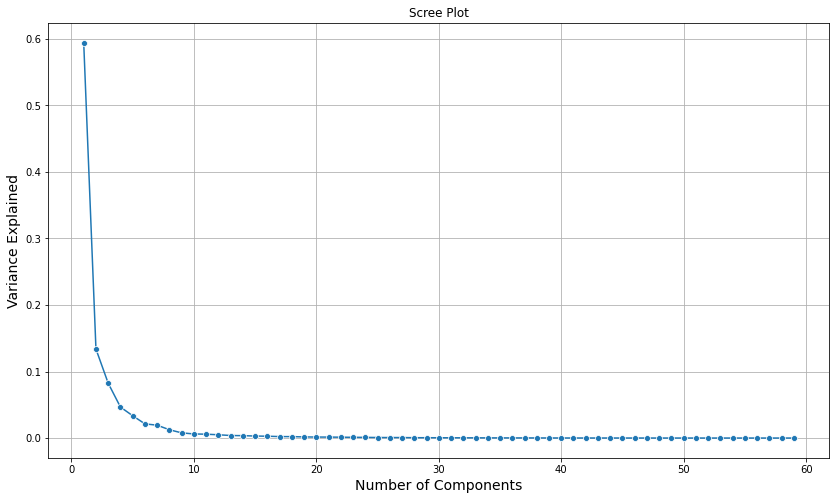

In [40]:
#Create a scree plot
plt.figure(figsize=(14,8))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,60),marker='o')
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Variance Explained',fontsize=14)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [41]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.5943039 , 0.72809735, 0.81051183, 0.85706456, 0.89057846,
       0.9118638 , 0.9311647 , 0.94360179, 0.95137641, 0.95751993,
       0.96328322, 0.96819842, 0.97198517, 0.97556479, 0.97856099,
       0.98129489, 0.98347656, 0.98560731, 0.98728758, 0.98875686,
       0.99016789, 0.99143264, 0.99252503, 0.99354707, 0.99432888,
       0.99507964, 0.99579998, 0.99631628, 0.99679125, 0.99722915,
       0.99760726, 0.99796368, 0.99827604, 0.99853409, 0.99876637,
       0.99895779, 0.99914294, 0.99929356, 0.99941429, 0.99950339,
       0.99958276, 0.99965364, 0.99972389, 0.99977758, 0.9998138 ,
       0.99984923, 0.99988094, 0.99990482, 0.99992299, 0.99993899,
       0.9999532 , 0.99996404, 0.99997362, 0.99998079, 0.99998693,
       0.99999203, 0.99999547, 0.99999775, 0.99999924])

In [42]:
#Choose the PCs basis cumulative explained variance
df1_selected = df_extracted_loadings[['PC1','PC2','PC3','PC4','PC5','PC6']]

In [43]:
df1_selected

,PC1,PC2,PC3,PC4,PC5,PC6
State Code,0.030180,-0.183228,0.284126,-0.012639,0.135089,-0.217180
Dist.Code,0.030155,-0.180139,0.288212,-0.035532,0.120905,-0.216641
No_HH,0.149496,-0.122688,0.064531,0.075516,-0.029621,-0.050646
TOT_M,0.159057,-0.067498,-0.063084,0.052942,-0.050413,0.081720
TOT_F,0.158274,-0.091021,0.000705,0.069722,-0.034679,0.014270
M_06,0.156038,-0.004686,-0.084921,0.028129,-0.080071,0.107255
F_06,0.156532,-0.000324,-0.076555,0.015778,-0.076824,0.102817
M_SC,0.143112,-0.062606,-0.076798,0.010915,-0.169667,0.019347
F_SC,0.143456,-0.079191,-0.019971,0.016488,-0.161238,-0.042825
M_ST,0.019280,0.027312,0.289774,0.076912,0.268154,0.499397


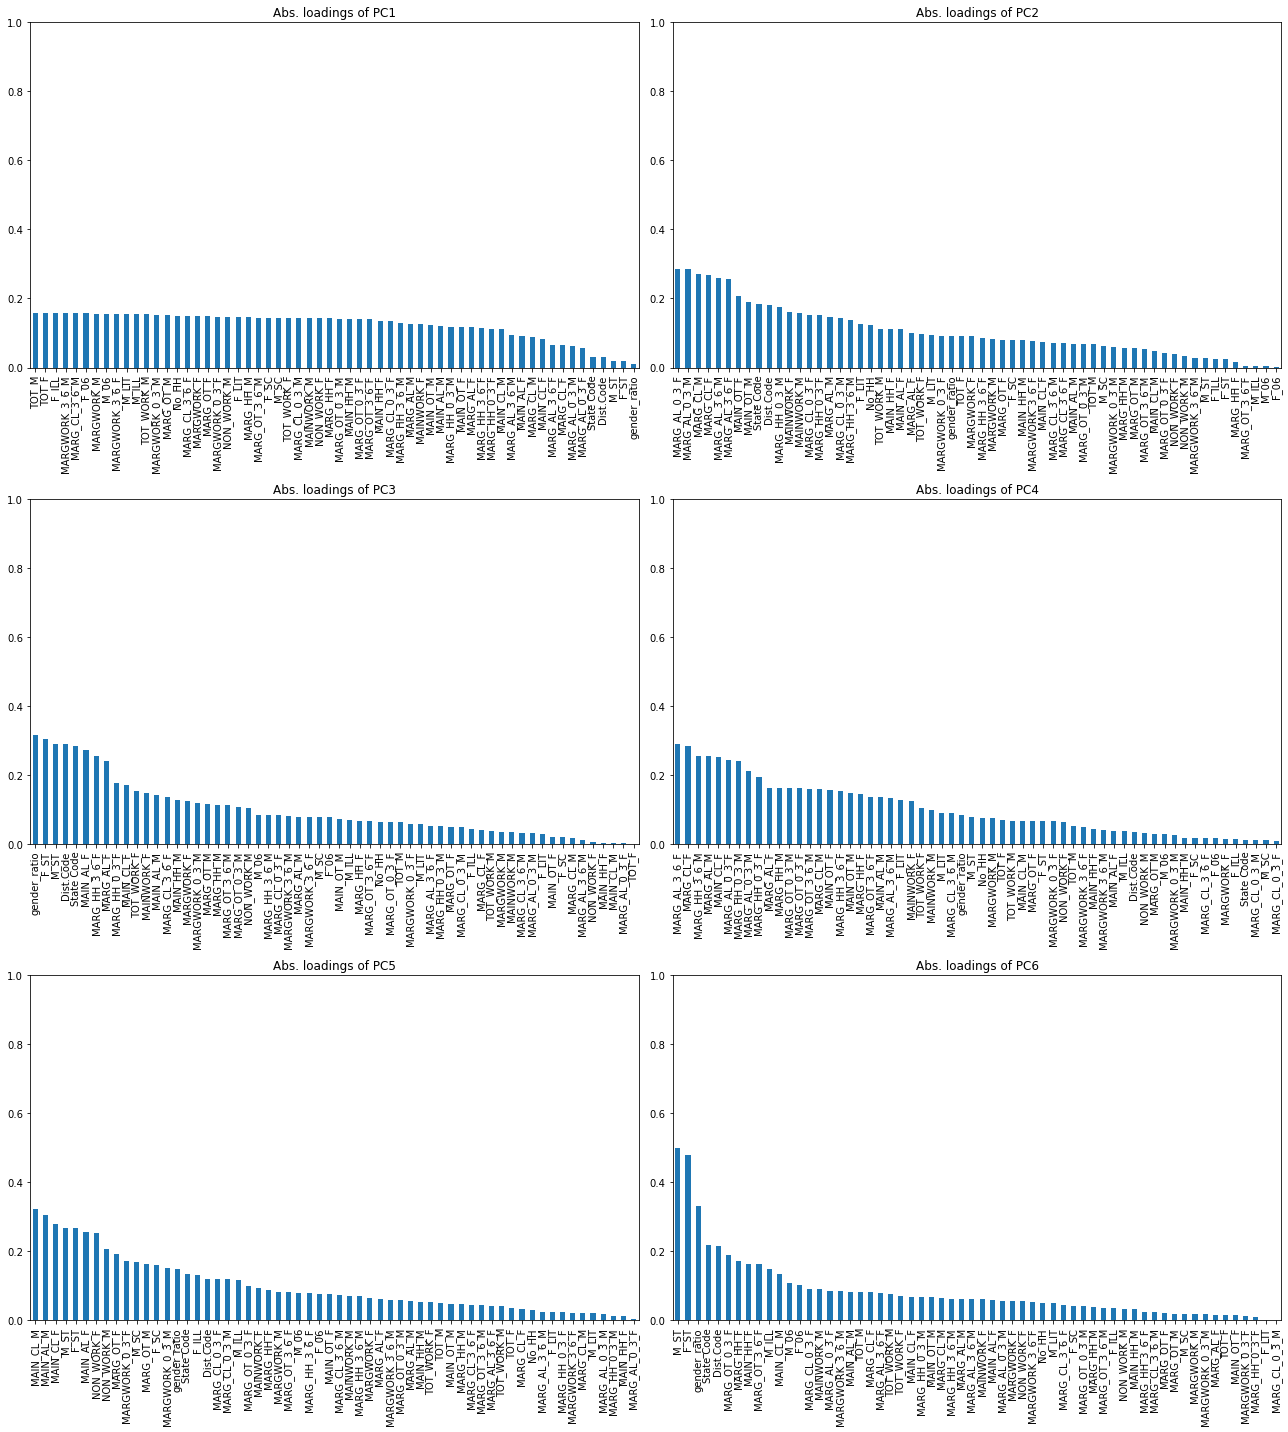

In [44]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (18,20))
for i in range(len(df1_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df1_selected[df1_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df1_selected.columns[i]))
    plt.tight_layout()

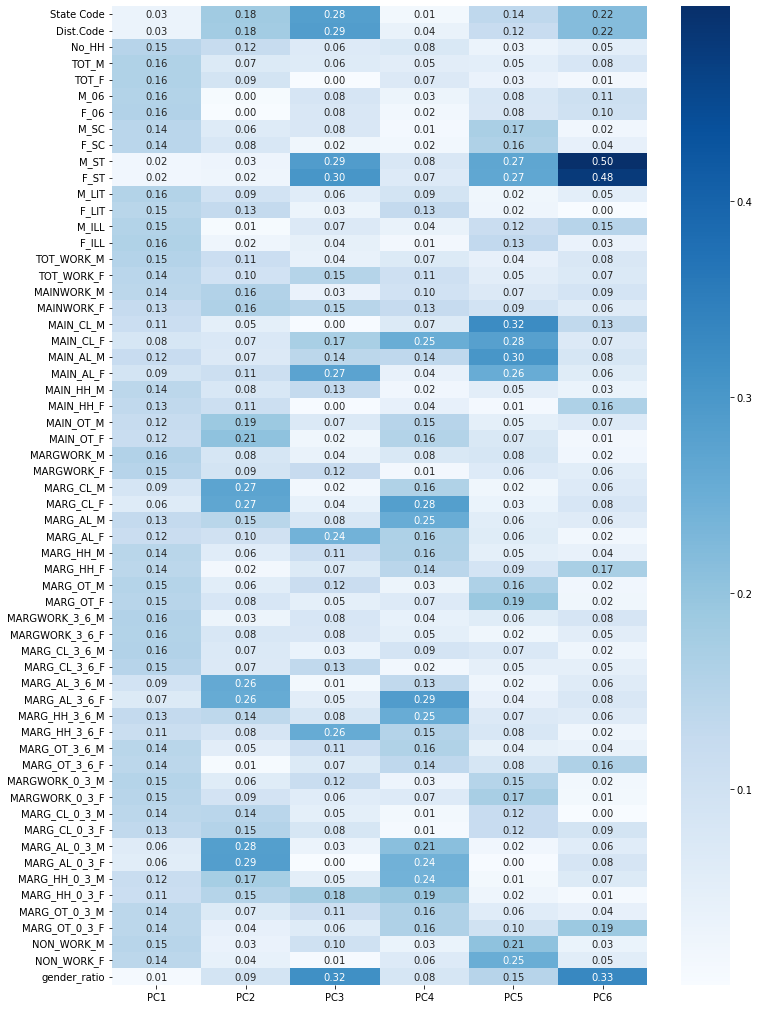

In [45]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,18))
sns.heatmap(abs(df1_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [47]:
#In order to calculate PC scores we need loadings, below:
df1_selected

,PC1,PC2,PC3,PC4,PC5,PC6
State Code,0.030180,-0.183228,0.284126,-0.012639,0.135089,-0.217180
Dist.Code,0.030155,-0.180139,0.288212,-0.035532,0.120905,-0.216641
No_HH,0.149496,-0.122688,0.064531,0.075516,-0.029621,-0.050646
TOT_M,0.159057,-0.067498,-0.063084,0.052942,-0.050413,0.081720
TOT_F,0.158274,-0.091021,0.000705,0.069722,-0.034679,0.014270
M_06,0.156038,-0.004686,-0.084921,0.028129,-0.080071,0.107255
F_06,0.156532,-0.000324,-0.076555,0.015778,-0.076824,0.102817
M_SC,0.143112,-0.062606,-0.076798,0.010915,-0.169667,0.019347
F_SC,0.143456,-0.079191,-0.019971,0.016488,-0.161238,-0.042825
M_ST,0.019280,0.027312,0.289774,0.076912,0.268154,0.499397


In [48]:
#...and we need the original scaled features
df1_data_scaled.iloc[0]

State Code       -1.710782
Dist.Code        -1.729347
No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
M

In [49]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df1_selected.columns:
    pc_score = np.dot(df1_selected[i], df1_data_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-5.616281 1.263699 -2.45893 -1.255874 0.136445 0.962271 

In [50]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df1_data_scaled)

In [51]:
pca_final_df = pd.DataFrame(pca_final, columns = df1_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-5.616281,1.263699,-2.458929,-1.255875,0.136447,0.962268
1,-5.573137,0.871573,-3.239973,-1.754891,-0.119211,0.339864
2,-7.577041,0.285877,-0.885768,0.140977,0.254632,0.691885
3,-8.014552,-0.021404,-1.563600,-0.635783,0.020424,0.501390
4,-5.277104,2.902256,-1.298800,1.152793,0.926201,0.563210
5,-3.757089,5.154696,-1.123231,3.416742,1.304992,-0.054640
6,-6.267850,0.535190,-2.283259,-0.083541,-0.413273,0.607426
7,-5.527148,1.059177,-2.523430,-1.102395,0.128031,0.429010
8,-6.184260,0.846409,-2.588203,-1.505977,0.227300,0.261608
9,-5.059262,-1.057383,-3.020385,-0.592232,0.409821,0.499078


In [154]:
pca_final_df = pd.DataFrame(pca_final, columns = df1_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-5.616281,1.263699,-2.458929,-1.255875,0.136447,0.962268
1,-5.573137,0.871573,-3.239973,-1.754891,-0.119211,0.339864
2,-7.577041,0.285877,-0.885768,0.140977,0.254632,0.691885
3,-8.014552,-0.021404,-1.563600,-0.635783,0.020424,0.501390
4,-5.277104,2.902256,-1.298800,1.152793,0.926201,0.563210
5,-3.757089,5.154696,-1.123231,3.416742,1.304992,-0.054640
6,-6.267850,0.535190,-2.283259,-0.083541,-0.413273,0.607426
7,-5.527148,1.059177,-2.523430,-1.102395,0.128031,0.429010
8,-6.184260,0.846409,-2.588203,-1.505977,0.227300,0.261608
9,-5.059262,-1.057383,-3.020385,-0.592232,0.409821,0.499078


In [ ]:
pca_final_df.groupby('State')['gender_ratio'].min().sort_values(ascending = False).reset_index()

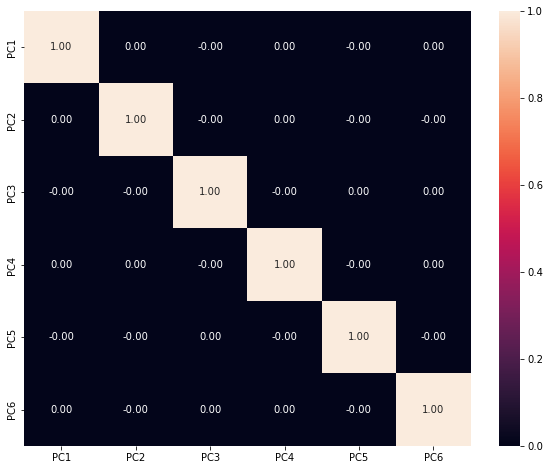

In [52]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');